# Home Credit Default Risk

## Overview
For financial institutes like banks giving loan to customers is a complicated process. Bank want to ensure that it gives loans to those customers who have low risk. If the customer defaults in repaying loans it will be a loss to Bank. That is why Banks perform extensive credit risk analysis before approving the loan to customer. 

In this capstone project I have chosen Kaggle competition challenge “Home Credit  Default Analysis” where I also participated in the competition. The URL for the competition is: 
https://www.kaggle.com/c/home-credit-default-risk

Home Credit is a global financial institute which provides loans to lender. Home Credit operates in 10 countries globally
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.
While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.
I have analysed  the data provided by Home Credit data using statistical techniques. Next I have applied Machine Learning model to predict risk of each customer. My ultimate objective is to get the model that has best ROC-AUC score




## Preprocess Datasets:

In this step I have first all the loaded datasets given:
* application_train.csv into dataframe application_train_data
* application_test.csv into dataframe application_test_data
* bureau.csv into into dataframe bureau
* bureau_balance.csv into dataframe bureau_balance
* POS_CASH_balance.csv into dataframe POS_CASH_balance
* credit_card_balance.csv into dataframe credit_card_balance
* previous_application.csv into dataframe  previous_application
* installments_payments.csv into dataframe installments_payments


Next, get separate dataframes from bureau.csv based on values in  CREDIT_ACTIVE field which are:
* Active as active_bereau_credit dataframe
* Closed as closed_bereau_credit dataframe
* Sold as sold_bereau_credit dataframe
* Bad debt as bad_debt_bereau_credit dataframe

Next, get total count of each type of CREDIT_ACTIVE group by SK_ID_CUR and load into dataframe bureau_credit_count

Next merge dataframe application_train_data with each of the dataframes  active_bereau_credit dataframe, closed_bereau_credit dataframe, sold_bereau_credit dataframe, bad_debt_bereau_credit dataframe by performing left join on field SK_ID_CURR and crea a new dataframe application_bureau_train_data

The above step do with application_train_data with the same set of bereau dataframes and create a new dataframe dataframe application_bureau_test_data


Similarly create separate dataframes for each contract type  in previous_application (i.e. Cash Loans, Consumer Loans, Revolving Loans, XNA). Create another dataframe which will have count of number of each type of contract_type in previous_application group by SK_ID_CUR. With application_bureau_train_data merge these dataframes by performing left join on SK_ID_CUR and create new dataframe application_bureau_loan_train_data. Similarly, with application_bureau_test_data merge these dataframes by performing left join on SK_ID_CUR and create new dataframe application_bureau_loan_test_data

Note: While modelling I have not used a few datasets like installment_payments, as these seem to me transacational dataset

The dataframe application_bureau_loan_train_data will be used for further analysis. When  any transformations or adding/deleting fields is done on application_bureau_loan_train_data, the same will be applied on application_bureau_test_data, as this is used for Kaggle public ranking


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)

In [3]:
# load application_train.csv into application_train_data dataframe
application_train_data = pd.read_csv('all/application_train.csv')
print('Training data shape:',application_train_data.shape)

Training data shape: (307511, 122)


In [4]:
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Get all the columns of application_train_data
application_train_data.columns.values.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
# load application_test.csv into application_test_data dataframe
application_test_data = pd.read_csv('all/application_test.csv')
print('Testing data shape:',application_test_data.shape)

Testing data shape: (48744, 121)


In [7]:
application_test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [9]:
bureau = pd.read_csv('all/bureau.csv')
print('Bureau data shape:',bureau.shape)
bureau.head()

Bureau data shape: (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
# Get all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [11]:
# Get count of all the types of CREDIT_ACTIVE
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [98]:
np.max(bureau['CNT_CREDIT_PROLONG'])

9

In [13]:
# Get summary of all the Active credit details
active_bereau_credit = bureau[bureau.CREDIT_ACTIVE=='Active'].groupby(['SK_ID_CURR'], as_index=False).sum()
active_bereau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,17689905,-928,0,3091.0,0.0,0.0,0,884025.000,596686.5,0.000,0.0,-32,24817.5
1,100002,12317812,-1145,0,780.0,0.0,40.5,0,481988.565,245781.0,31988.565,0.0,-31,0.0
2,100003,5885880,-606,0,1216.0,0.0,0.0,0,810000.000,0.0,810000.000,0.0,-43,0.0
3,100005,13470403,-199,0,1446.0,0.0,0.0,0,598626.000,568408.5,0.000,0.0,-42,4261.5
4,100008,6491434,-78,0,471.0,0.0,0.0,0,267606.000,240057.0,0.000,0.0,-16,0.0


In [14]:
np.max(active_bereau_credit['CNT_CREDIT_PROLONG'])

9

In [15]:
np.min(active_bereau_credit['DAYS_CREDIT_ENDDATE'])

-83445.0

In [14]:
np.min(active_bereau_credit['DAYS_ENDDATE_FACT'])

-8664.0

In [16]:
# Transform fields of active_bereau_credit
active_bereau_credit['DAYS_CREDIT'] =  active_bereau_credit['DAYS_CREDIT']/365.0
active_bereau_credit['DAYS_CREDIT_ENDDATE'] = active_bereau_credit['DAYS_CREDIT_ENDDATE']/365.0
active_bereau_credit['DAYS_ENDDATE_FACT'] =  active_bereau_credit['DAYS_ENDDATE_FACT']/365.0
active_bereau_credit['CREDIT_DAY_OVERDUE'] = active_bereau_credit['CREDIT_DAY_OVERDUE']/365.0 

active_bereau_credit = active_bereau_credit.rename(columns= {'DAYS_CREDIT': 'YEARS_CREDIT_ACTIVE',
                                                             'DAYS_CREDIT_ENDDATE': 'YEARS_CREDIT_ENDDATE_ACTIVE',
                                                             'DAYS_ENDDATE_FACT':'YEARS_ENDDATE_FACT_ACTIVE',
                                                             'CREDIT_DAY_OVERDUE':'CREDIT_YEAR_OVERDUE_ACTIVE',
                                                             'AMT_CREDIT_SUM': 'AMT_CREDIT_SUM_ACTIVE',
                                                             'AMT_CREDIT_SUM_DEBT':'AMT_CREDIT_SUM_DEBT_ACTIVE',
                                                             'AMT_CREDIT_SUM_LIMIT':'AMT_CREDIT_SUM_LIMIT_ACTIVE',
                                                             'AMT_CREDIT_MAX_OVERDUE':'AMT_CREDIT_MAX_OVERDUE_ACTIVE',
                                                             'AMT_CREDIT_SUM_OVERDUE':'AMT_CREDIT_SUM_OVERDUE_ACTIVE',
                                                             'AMT_ANNUITY':'AMT_ANNUITY_ACTIVE',
                                                             'CNT_CREDIT_PROLONG': 'CNT_CREDIT_PROLONG_ACTIVE'
                                                            })

active_bereau_credit.drop(['SK_ID_BUREAU',  'DAYS_CREDIT_UPDATE'], axis=1, inplace=True)

active_bereau_credit.fillna(0, inplace=True)
active_bereau_credit.head() 

,SK_ID_CURR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE
0,100001,-2.542466,0.0,8.468493,0.0,0.0,0,884025.000,596686.5,0.000,0.0,24817.5
1,100002,-3.136986,0.0,2.136986,0.0,40.5,0,481988.565,245781.0,31988.565,0.0,0.0
2,100003,-1.660274,0.0,3.331507,0.0,0.0,0,810000.000,0.0,810000.000,0.0,0.0
3,100005,-0.545205,0.0,3.961644,0.0,0.0,0,598626.000,568408.5,0.000,0.0,4261.5
4,100008,-0.213699,0.0,1.290411,0.0,0.0,0,267606.000,240057.0,0.000,0.0,0.0


In [17]:
# Get summary of all the Closed credit details
closed_bereau_credit = bureau[bureau.CREDIT_ACTIVE=='Closed'].groupby(['SK_ID_CURR'], as_index=False).sum()
closed_bereau_credit.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,23586526,-4217,0,-2514.0,-3302.0,0.000,0,569340.0,0.0,0.0,0.0,-620,0.0
1,100002,36908365,-5847,0,-2874.0,-4185.0,8364.645,0,383067.0,0.0,0.0,0.0,-3968,0.0
2,100003,17657634,-4997,0,-3394.0,-3292.0,0.000,0,207400.5,0.0,0.0,0.0,-3221,0.0
3,100004,13658267,-1734,0,-977.0,-1065.0,0.000,0,189037.8,0.0,0.0,0.0,-1064,0.0
4,100005,6735200,-373,0,-128.0,-123.0,0.000,0,58500.0,0.0,0.0,0.0,-121,0.0


In [18]:
np.max(closed_bereau_credit['CNT_CREDIT_PROLONG'])

6

In [19]:
# Transform fields of closed_bereau_credit
closed_bereau_credit['DAYS_CREDIT'] = closed_bereau_credit['DAYS_CREDIT']/365.0
closed_bereau_credit['DAYS_CREDIT_ENDDATE'] =  closed_bereau_credit['DAYS_CREDIT_ENDDATE']/365.0
closed_bereau_credit['DAYS_ENDDATE_FACT'] =  closed_bereau_credit['DAYS_ENDDATE_FACT']/365.0
closed_bereau_credit['CREDIT_DAY_OVERDUE'] = closed_bereau_credit['CREDIT_DAY_OVERDUE']/365.0 

closed_bereau_credit = closed_bereau_credit.rename(columns= {'DAYS_CREDIT': 'YEARS_CREDIT_CLOSED',
                                                          'DAYS_CREDIT_ENDDATE': 'YEARS_CREDIT_ENDDATE_CLOSED',
                                                          'DAYS_ENDDATE_FACT':'YEARS_ENDDATE_FACT_CLOSED',
                                                          'CREDIT_DAY_OVERDUE':'CREDIT_YEAR_OVERDUE_CLOSED',
                                                          'AMT_CREDIT_SUM': 'AMT_CREDIT_SUM_CLOSED',
                                                          'AMT_CREDIT_SUM_DEBT':'AMT_CREDIT_SUM_DEBT_CLOSED',
                                                          'AMT_CREDIT_SUM_LIMIT':'AMT_CREDIT_SUM_LIMIT_CLOSED',
                                                          'AMT_CREDIT_MAX_OVERDUE':'AMT_CREDIT_MAX_OVERDUE_CLOSED',
                                                          'AMT_CREDIT_SUM_OVERDUE':'AMT_CREDIT_SUM_OVERDUE_CLOSED',
                                                          'AMT_ANNUITY':'AMT_ANNUITY_CLOSED',
                                                          'CNT_CREDIT_PROLONG': 'CNT_CREDIT_PROLONG_CLOSED'
                                                            })

closed_bereau_credit.drop(['SK_ID_BUREAU',   'DAYS_CREDIT_UPDATE'], axis=1, inplace=True)
closed_bereau_credit.fillna(0, inplace=True)

closed_bereau_credit.head()  

,SK_ID_CURR,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED
0,100001,-11.553425,0.0,-6.887671,-9.046575,0.000,0,569340.0,0.0,0.0,0.0,0.0
1,100002,-16.019178,0.0,-7.873973,-11.465753,8364.645,0,383067.0,0.0,0.0,0.0,0.0
2,100003,-13.690411,0.0,-9.298630,-9.019178,0.000,0,207400.5,0.0,0.0,0.0,0.0
3,100004,-4.750685,0.0,-2.676712,-2.917808,0.000,0,189037.8,0.0,0.0,0.0,0.0
4,100005,-1.021918,0.0,-0.350685,-0.336986,0.000,0,58500.0,0.0,0.0,0.0,0.0


In [20]:
# Get summary of all the Sold credit details
sold_bereau_credit = bureau[bureau.CREDIT_ACTIVE=='Sold'].groupby(['SK_ID_CURR'], as_index=False).sum()
sold_bereau_credit.head() 

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100039,5153449,-1206,0,-980.0,0.0,0.0,0,945000.0,0.0,0.0,0.0,-109,0.00
1,100128,5941041,-2641,0,-1987.0,0.0,0.0,0,1003500.0,0.0,0.0,0.0,-1984,0.00
2,100162,6131361,-1998,0,-1272.0,0.0,0.0,0,82768.5,0.0,0.0,0.0,-1998,14882.85
3,100170,5915577,-147,0,0.0,0.0,0.0,0,13500.0,13770.0,0.0,0.0,-105,16200.00
4,100201,5928807,-2270,0,-1907.0,0.0,0.0,0,69898.5,0.0,0.0,0.0,-2154,0.00


In [21]:
np.max(sold_bereau_credit['CNT_CREDIT_PROLONG'])

1

In [22]:
# Transform fields of sold_bereau_credit
sold_bereau_credit['DAYS_CREDIT'] =  sold_bereau_credit['DAYS_CREDIT']/365.0
sold_bereau_credit['DAYS_CREDIT_ENDDATE'] = sold_bereau_credit['DAYS_CREDIT_ENDDATE']/365.0
sold_bereau_credit['DAYS_ENDDATE_FACT'] =  sold_bereau_credit['DAYS_ENDDATE_FACT']/365.0
sold_bereau_credit['CREDIT_DAY_OVERDUE'] = sold_bereau_credit['CREDIT_DAY_OVERDUE']/365.0 

sold_bereau_credit = sold_bereau_credit.rename(columns= {'DAYS_CREDIT': 'YEARS_CREDIT_SOLD',
                                                          'DAYS_CREDIT_ENDDATE': 'YEARS_CREDIT_ENDDATE_SOLD',
                                                          'DAYS_ENDDATE_FACT':'YEARS_ENDDATE_FACT_SOLD',
                                                          'CREDIT_DAY_OVERDUE':'CREDIT_YEAR_OVERDUE_SOLD',
                                                          'AMT_CREDIT_SUM': 'AMT_CREDIT_SUM_SOLD',
                                                          'AMT_CREDIT_SUM_DEBT':'AMT_CREDIT_SUM_DEBT_SOLD',
                                                          'AMT_CREDIT_SUM_LIMIT':'AMT_CREDIT_SUM_LIMIT_SOLD',
                                                          'AMT_CREDIT_MAX_OVERDUE':'AMT_CREDIT_MAX_OVERDUE_SOLD',
                                                          'AMT_CREDIT_SUM_OVERDUE':'AMT_CREDIT_SUM_OVERDUE_SOLD',
                                                           'AMT_ANNUITY':'AMT_ANNUITY_SOLD',
                                                           'CNT_CREDIT_PROLONG': 'CNT_CREDIT_PROLONG_SOLD'
                                                            })

sold_bereau_credit.drop(['SK_ID_BUREAU', 'DAYS_CREDIT_UPDATE'], axis=1, inplace=True)
sold_bereau_credit.fillna(0, inplace=True)

sold_bereau_credit.head()  

,SK_ID_CURR,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD
0,100039,-3.304110,0.0,-2.684932,0.0,0.0,0,945000.0,0.0,0.0,0.0,0.00
1,100128,-7.235616,0.0,-5.443836,0.0,0.0,0,1003500.0,0.0,0.0,0.0,0.00
2,100162,-5.473973,0.0,-3.484932,0.0,0.0,0,82768.5,0.0,0.0,0.0,14882.85
3,100170,-0.402740,0.0,0.000000,0.0,0.0,0,13500.0,13770.0,0.0,0.0,16200.00
4,100201,-6.219178,0.0,-5.224658,0.0,0.0,0,69898.5,0.0,0.0,0.0,0.00


In [23]:
# Get summary of all the bad debt credit details
bad_debt_bereau_credit = bureau[bureau.CREDIT_ACTIVE=='Bad debt'].groupby(['SK_ID_CURR'], as_index=False).sum()
bad_debt_bereau_credit.head(10)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,158069,6039562,-1683,366,-862.0,0.0,0.000,0,528165.00,0.000,0.000,503392.5,-1217,0.0
1,163442,5997537,-1502,366,-1292.0,0.0,0.000,0,57960.00,0.000,0.000,0.0,-1292,0.0
2,176952,5326184,-2241,1135,-1876.0,0.0,39991.500,0,450000.00,0.000,0.000,42.3,-737,0.0
3,186360,5499851,-1218,366,-852.0,0.0,0.000,0,121275.00,0.000,0.000,0.0,-1035,0.0
4,207535,5300044,-2834,0,-1724.0,-642.0,197937.225,0,135000.00,182632.635,-47632.635,0.0,-642,0.0
5,231185,5173404,-2740,1761,-2558.0,0.0,2137.500,0,14296.50,7717.500,0.000,7717.5,-888,0.0
6,232061,6441729,-2899,0,-1773.0,-1434.0,242637.480,0,365670.72,0.000,0.000,0.0,-1434,0.0
7,243877,6446445,-2493,366,-898.0,0.0,0.000,0,162000.00,0.000,0.000,17541.0,-1449,0.0
8,264970,5345303,-2728,0,-2514.0,-499.0,10530.000,0,57550.50,0.000,0.000,0.0,-499,12105.0
9,273612,5309530,-2112,0,-1900.0,-1550.0,40871.880,0,22510.89,0.000,0.000,0.0,-1550,0.0


In [24]:
np.max(bad_debt_bereau_credit['CNT_CREDIT_PROLONG'])

1

In [25]:
# Transform fields of bad_debt_bereau_credit
bad_debt_bereau_credit['DAYS_CREDIT'] =  bad_debt_bereau_credit['DAYS_CREDIT']/365.0
bad_debt_bereau_credit['DAYS_CREDIT_ENDDATE'] =  bad_debt_bereau_credit['DAYS_CREDIT_ENDDATE']/365.0
bad_debt_bereau_credit['DAYS_ENDDATE_FACT'] =  bad_debt_bereau_credit['DAYS_ENDDATE_FACT']/365.0
bad_debt_bereau_credit['CREDIT_DAY_OVERDUE'] = bad_debt_bereau_credit['CREDIT_DAY_OVERDUE']/365.0 

bad_debt_bereau_credit = bad_debt_bereau_credit.rename(columns= {'DAYS_CREDIT': 'YEARS_CREDIT_BAD_DEBT',
                                                          'DAYS_CREDIT_ENDDATE': 'YEARS_CREDIT_ENDDATE_BAD_DEBT',
                                                          'DAYS_ENDDATE_FACT':'YEARS_ENDDATE_FACT_BAD_DEBT',
                                                          'CREDIT_DAY_OVERDUE':'CREDIT_YEAR_OVERDUE_BAD_DEBT',
                                                          'AMT_CREDIT_SUM': 'AMT_CREDIT_SUM_BAD_DEBT',
                                                          'AMT_CREDIT_SUM_DEBT':'AMT_CREDIT_SUM_DEBT_BAD_DEBT',
                                                          'AMT_CREDIT_SUM_LIMIT':'AMT_CREDIT_SUM_LIMIT_BAD_DEBT',
                                                          'AMT_CREDIT_MAX_OVERDUE':'AMT_CREDIT_MAX_OVERDUE_BAD_DEBT',
                                                          'AMT_CREDIT_SUM_OVERDUE':'AMT_CREDIT_SUM_OVERDUE_BAD_DEBT',
                                                           'AMT_ANNUITY':'AMT_ANNUITY_BAD_DEBT',
                                                            'CNT_CREDIT_PROLONG': 'CNT_CREDIT_PROLONG_BAD_DEBT'
                                                            })

bad_debt_bereau_credit.drop(['SK_ID_BUREAU', 'DAYS_CREDIT_UPDATE'], axis=1, inplace=True)
bad_debt_bereau_credit.fillna(0, inplace=True)
bad_debt_bereau_credit.head()  

,SK_ID_CURR,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT
0,158069,-4.610959,1.002740,-2.361644,0.000000,0.000,0,528165.0,0.000,0.000,503392.5,0.0
1,163442,-4.115068,1.002740,-3.539726,0.000000,0.000,0,57960.0,0.000,0.000,0.0,0.0
2,176952,-6.139726,3.109589,-5.139726,0.000000,39991.500,0,450000.0,0.000,0.000,42.3,0.0
3,186360,-3.336986,1.002740,-2.334247,0.000000,0.000,0,121275.0,0.000,0.000,0.0,0.0
4,207535,-7.764384,0.000000,-4.723288,-1.758904,197937.225,0,135000.0,182632.635,-47632.635,0.0,0.0


In [26]:
# Group count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
bureau_credit_count = bureau.pivot_table(index=['SK_ID_CURR'], columns='CREDIT_ACTIVE', aggfunc='size', fill_value=0).reset_index()
bureau_credit_count = bureau_credit_count.rename(columns= {"Bad debt":"Bad_debt"})
bureau_credit_count.fillna(0, inplace=True)
bureau_credit_count.head()

CREDIT_ACTIVE,SK_ID_CURR,Active,Bad_debt,Closed,Sold
0,100001,3,0,4,0
1,100002,2,0,6,0
2,100003,1,0,3,0
3,100004,0,0,2,0
4,100005,2,0,1,0


In [27]:
# Merge application_train_data with all the bereau information and make new dataframe as application_bureau_train_data
application_bureau_train_data = pd.merge(application_train_data , active_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_train_data = pd.merge(application_bureau_train_data, closed_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_train_data = pd.merge(application_bureau_train_data, sold_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_train_data = pd.merge(application_bureau_train_data, bad_debt_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_train_data = pd.merge(application_bureau_train_data, bureau_credit_count, how='left', on='SK_ID_CURR')
application_bureau_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.

In [28]:
# Merge application_train_data with all the bereau information and make new dataframe as application_bureau_test_data
application_bureau_test_data = pd.merge(application_test_data , active_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_test_data = pd.merge(application_bureau_test_data, closed_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_test_data = pd.merge(application_bureau_test_data, sold_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_test_data = pd.merge(application_bureau_test_data, bad_debt_bereau_credit, how='left', on='SK_ID_CURR')
application_bureau_test_data = pd.merge(application_bureau_test_data, bureau_credit_count, how='left', on='SK_ID_CURR')
application_bureau_test_data.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-2.542466,0.0,8.468493,0.0,0.0,0.0,88402

In [29]:
bureau_balance_data = pd.read_csv('all/bureau_balance.csv')
print('Bureau Balance data shape:',bureau_balance_data.shape)
bureau_balance_data.head(10)

Bureau Balance data shape: (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [31]:
# Load previous_application.csv into dataframe previous_application
previous_application = pd.read_csv('all/previous_application.csv')
print('Previous Application shape:',previous_application.shape)
previous_application.head()

Previous Application shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Get count of all the loan Contract Types
previous_application['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [33]:
# Get summary of all the cash loan information
previous_application_cash_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Cash loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_cash_loan = previous_application_cash_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_cash_loan = previous_application_cash_loan.rename(columns={'AMT_ANNUITY': 'PREV_CASH_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CASH_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CASH_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CASH_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CASH_AMT_GOODS_PRICE' })
previous_application_cash_loan.fillna(0)
previous_application_cash_loan.head()

,SK_ID_CURR,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE
0,100003,98356.995,900000.0,1035882.0,0.0,900000.0
1,100005,0.000,0.0,0.0,0.0,0.0
2,100006,96896.610,1818000.0,2063110.5,0.0,1818000.0
3,100007,68237.010,855000.0,954553.5,0.0,855000.0
4,100008,25309.575,450000.0,501975.0,0.0,450000.0


In [34]:
# Get summary of all the consumer loan information
previous_application_consumer_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Consumer loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_consumer_loan = previous_application_consumer_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_consumer_loan = previous_application_consumer_loan.rename(columns={'AMT_ANNUITY': 'PREV_CONSUMER_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_CONSUMER_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_CONSUMER_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_CONSUMER_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_CONSUMER_AMT_GOODS_PRICE' })
previous_application_consumer_loan.fillna(0)
previous_application_consumer_loan.head()

,SK_ID_CURR,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE
0,100001,3951.000,24835.5,23787.0,2520.0,24835.5
1,100002,9251.775,179055.0,179055.0,0.0,179055.0
2,100003,71304.975,406309.5,416691.0,6885.0,406309.5
3,100004,5357.250,24282.0,20106.0,4860.0,24282.0
4,100005,4813.200,44617.5,40153.5,4464.0,44617.5


In [35]:
# Get summary of all the revolving loan information
previous_application_revolving_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='Revolving loans'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_revolving_loan = previous_application_revolving_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_revolving_loan = previous_application_revolving_loan.rename(columns={'AMT_ANNUITY': 'PREV_REVOVING_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_REVOLVING_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_REVOLVING_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_REVOVING_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_REVOVING_AMT_GOODS_PRICE' })
previous_application_revolving_loan.fillna(0)
previous_application_revolving_loan.head()

,SK_ID_CURR,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE
0,100006,13500.0,270000.0,270000.0,0.0,270000.0
1,100011,9000.0,0.0,180000.0,0.0,0.0
2,100021,33750.0,0.0,675000.0,0.0,0.0
3,100023,2250.0,45000.0,45000.0,0.0,45000.0
4,100028,11250.0,0.0,225000.0,0.0,0.0


In [36]:
# Get summary of all the XNA loan information
previous_application_XNA_loan = previous_application[previous_application.NAME_CONTRACT_TYPE=='XNA'].groupby(['SK_ID_CURR'], as_index=False).sum()
previous_application_XNA_loan = previous_application_XNA_loan[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'] ]
previous_application_XNA_loan = previous_application_XNA_loan.rename(columns={'AMT_ANNUITY': 'PREV_XNA_AMT_ANNUITY', 'AMT_APPLICATION': 'PREV_XNA_AMT_APPLICATION', 'AMT_CREDIT': 'PREV_XNA_AMT_CREDIT','AMT_DOWN_PAYMENT':'PREV_XNA_AMT_DOWN_PAYMENT','AMT_GOODS_PRICE':'PREV_XNA_AMT_GOODS_PRICE' })
previous_application_XNA_loan.fillna(0)
previous_application_XNA_loan.head()

,SK_ID_CURR,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE
0,100523,0.0,0.0,0.0,0.0,0.0
1,101728,0.0,0.0,0.0,0.0,0.0
2,103244,0.0,0.0,0.0,0.0,0.0
3,103715,0.0,0.0,0.0,0.0,0.0
4,105000,0.0,0.0,0.0,0.0,0.0


In [37]:
# Group count of Active, Bad_debt, Closed, Sold by SK_ID_CURR
previous_application_loan_count = previous_application.pivot_table(index=['SK_ID_CURR'], columns='NAME_CONTRACT_TYPE', aggfunc='size', fill_value=0).reset_index()
previous_application_loan_count = previous_application_loan_count.rename(columns= {"Cash loans":"CASH_LOANS", "Consumer loans": "CONSUMER_LOANS", "Revolving loans":"REVOLVING_LOANS"})
previous_application_loan_count.fillna(0)
previous_application_loan_count.head()

NAME_CONTRACT_TYPE,SK_ID_CURR,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,0,1,0,0
1,100002,0,1,0,0
2,100003,1,2,0,0
3,100004,0,1,0,0
4,100005,1,1,0,0


In [38]:
# Merge all the previous application loan data with train and bereau data to create new dataframe application_bureau_loan_train_data
application_bureau_loan_train_data = pd.merge(application_bureau_train_data , previous_application_cash_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_train_data = pd.merge(application_bureau_loan_train_data , previous_application_consumer_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_train_data = pd.merge(application_bureau_loan_train_data , previous_application_revolving_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_train_data = pd.merge(application_bureau_loan_train_data , previous_application_XNA_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_train_data = pd.merge(application_bureau_loan_train_data , previous_application_loan_count, how='left', on='SK_ID_CURR')
application_bureau_loan_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Un

In [39]:
# Merge all the previous application loan data with test and bereau data to create new dataframe application_bureau_loan_train_data
application_bureau_loan_test_data = pd.merge(application_bureau_test_data , previous_application_cash_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_test_data = pd.merge(application_bureau_loan_test_data , previous_application_consumer_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_test_data = pd.merge(application_bureau_loan_test_data , previous_application_revolving_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_test_data = pd.merge(application_bureau_loan_test_data , previous_application_XNA_loan, how='left', on='SK_ID_CURR')
application_bureau_loan_test_data = pd.merge(application_bureau_loan_test_data , previous_application_loan_count, how='left', on='SK_ID_CURR')
application_bureau_loan_test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompani

In [40]:
pos_cash_balance = pd.read_csv('all/POS_CASH_balance.csv')
print('Pos cash data shape:',pos_cash_balance.shape)
pos_cash_balance.head()

Pos cash data shape: (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [41]:
credit_card_balance = pd.read_csv('all/credit_card_balance.csv')
print('Credit card balance data shape:',credit_card_balance.shape)
credit_card_balance.head()

Credit card balance data shape: (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [42]:
installments_payments = pd.read_csv('all/installments_payments.csv')
print('Installments payments data shape:',installments_payments.shape)
installments_payments.head()

Installments payments data shape: (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## Missing Data Analysis

In this step, we first get which all columns have missing values and then calculate percentage of records which have missing values in each column. 

Next find out all the columns whose type is string and fill value 'NA' for all the missing values
For remainging misssing values which are numerics, fill value 0

In [43]:
application_bureau_loan_train_data.isnull().any()

SK_ID_CURR                         False
TARGET                             False
NAME_CONTRACT_TYPE                 False
CODE_GENDER                        False
FLAG_OWN_CAR                       False
FLAG_OWN_REALTY                    False
CNT_CHILDREN                       False
AMT_INCOME_TOTAL                   False
AMT_CREDIT                         False
AMT_ANNUITY                         True
AMT_GOODS_PRICE                     True
NAME_TYPE_SUITE                     True
NAME_INCOME_TYPE                   False
NAME_EDUCATION_TYPE                False
NAME_FAMILY_STATUS                 False
NAME_HOUSING_TYPE                  False
REGION_POPULATION_RELATIVE         False
DAYS_BIRTH                         False
DAYS_EMPLOYED                      False
DAYS_REGISTRATION                  False
DAYS_ID_PUBLISH                    False
OWN_CAR_AGE                         True
FLAG_MOBIL                         False
FLAG_EMP_PHONE                     False
FLAG_WORK_PHONE 

In [44]:
missing_info = list(application_bureau_loan_train_data.columns[application_bureau_loan_train_data.isnull().any()])
missing_info

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [45]:
# Find and Display percentage of missing values in each column
for col in missing_info:
    percent_missing = application_bureau_loan_train_data[application_bureau_loan_train_data[col].isnull() == True].shape[0] / application_train_data.shape[0] * 100
    print('percent missing for column {}: {:.2f}%'.format(col, round(percent_missing, 2)))

percent missing for column AMT_ANNUITY: 0.00%
percent missing for column AMT_GOODS_PRICE: 0.09%
percent missing for column NAME_TYPE_SUITE: 0.42%
percent missing for column OWN_CAR_AGE: 65.99%
percent missing for column OCCUPATION_TYPE: 31.35%
percent missing for column CNT_FAM_MEMBERS: 0.00%
percent missing for column EXT_SOURCE_1: 56.38%
percent missing for column EXT_SOURCE_2: 0.21%
percent missing for column EXT_SOURCE_3: 19.83%
percent missing for column APARTMENTS_AVG: 50.75%
percent missing for column BASEMENTAREA_AVG: 58.52%
percent missing for column YEARS_BEGINEXPLUATATION_AVG: 48.78%
percent missing for column YEARS_BUILD_AVG: 66.50%
percent missing for column COMMONAREA_AVG: 69.87%
percent missing for column ELEVATORS_AVG: 53.30%
percent missing for column ENTRANCES_AVG: 50.35%
percent missing for column FLOORSMAX_AVG: 49.76%
percent missing for column FLOORSMIN_AVG: 67.85%
percent missing for column LANDAREA_AVG: 59.38%
percent missing for column LIVINGAPARTMENTS_AVG: 68.3

In [46]:
# For application_bureau_loan_train_data populate all the missing string fields to NA
# Populate all the missing numerical fields to 0
str_cols = application_bureau_loan_train_data.columns[application_bureau_loan_train_data.dtypes==object]
application_bureau_loan_train_data[str_cols] = application_bureau_loan_train_data[str_cols].fillna('NA')
application_bureau_loan_train_data.fillna(0,inplace=True)

In [47]:
# Confirm if there is no more missing information present
missing_info = list(application_bureau_loan_train_data.columns[application_bureau_loan_train_data.isnull().any()])
missing_info

[]

In [48]:
# For application_bureau_loan_teest_data Populate all the missing object to NA
# Populate all teh missing numerical fields to 0
str_cols = application_bureau_loan_test_data.columns[application_bureau_loan_test_data.dtypes==object]
application_bureau_loan_test_data[str_cols] = application_bureau_loan_test_data[str_cols].fillna('NA')
application_bureau_loan_test_data.fillna(0,inplace=True)

## Analyze the Data
### First try to understand the data by looking a few records

In [46]:
application_bureau_loan_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Un

In [108]:
application_bureau_loan_train_data[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_TYPE_SUITE'
              
 ]].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE
0,100002,1,Cash loans,M,N,Y,0,12.218500,12.915581,10.114619,12.768544,Unaccompanied
1,100003,0,Cash loans,F,N,N,0,12.506181,14.072865,10.482892,13.937287,Family
2,100004,0,Revolving loans,M,Y,Y,0,11.119898,11.813037,8.817446,11.813037,Unaccompanied
3,100006,0,Cash loans,F,N,Y,0,11.813037,12.652947,10.298481,12.601491,Unaccompanied
4,100007,0,Cash loans,M,N,Y,0,11.707678,13.148033,9.992711,13.148033,Unaccompanied


In [109]:
application_bureau_loan_train_data[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_TYPE_SUITE'
             
 ]].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,11.909245,13.070108,10.067282,12.948771
std,102790.175348,0.272419,0.722121,0.488906,0.715193,0.549482,0.814384
min,100002.000000,0.000000,0.000000,10.152338,10.714440,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,11.630717,12.506181,9.712630,12.382129
50%,278202.000000,0.000000,0.000000,11.899215,13.149068,10.122784,13.017005
75%,367142.500000,0.000000,1.000000,12.218500,13.603123,10.451522,13.429114
max,456255.000000,1.000000,19.000000,18.577685,15.214228,12.460818,15.214228


In [110]:
application_bureau_loan_train_data[[
'CNT_CREDIT_PROLONG_ACTIVE',
'CNT_CREDIT_PROLONG_CLOSED',  
'CNT_CREDIT_PROLONG_BAD_DEBT',
'CNT_CREDIT_PROLONG_SOLD',
'Active',
'Closed',
'Bad_debt',
'Sold',
'CASH_LOANS',
'CONSUMER_LOANS',
'REVOLVING_LOANS',
'XNA']].head()  

,CNT_CREDIT_PROLONG_ACTIVE,CNT_CREDIT_PROLONG_CLOSED,CNT_CREDIT_PROLONG_BAD_DEBT,CNT_CREDIT_PROLONG_SOLD,Active,Closed,Bad_debt,Sold,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0


In [111]:
application_bureau_loan_train_data[[
'CNT_CREDIT_PROLONG_ACTIVE',
'CNT_CREDIT_PROLONG_CLOSED',  
'CNT_CREDIT_PROLONG_BAD_DEBT',
'CNT_CREDIT_PROLONG_SOLD',
'Active',
'Closed',
'Bad_debt',
'Sold',
'CASH_LOANS',
'CONSUMER_LOANS',
'REVOLVING_LOANS',
'XNA']].describe()  

,CNT_CREDIT_PROLONG_ACTIVE,CNT_CREDIT_PROLONG_CLOSED,CNT_CREDIT_PROLONG_BAD_DEBT,CNT_CREDIT_PROLONG_SOLD,Active,Closed,Bad_debt,Sold,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.021820,0.012744,0.000003,0.000114,1.762275,2.984391,0.000065,0.018383,2.038184,2.033280,0.524755,0.001018
std,0.183987,0.133433,0.001803,0.010668,1.804891,3.359529,0.008064,0.146403,3.180878,1.828083,0.989541,0.034999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.000000
max,9.000000,6.000000,1.000000,1.000000,32.000000,108.000000,1.000000,9.000000,60.000000,45.000000,31.000000,3.000000


### Get the event rate

Event rate percentage is calculated by dividing number of 1 in TARGET field by total number of records multiplied by 100

In [228]:
event_rate = (sum(application_bureau_loan_train_data.loc[application_bureau_loan_train_data['TARGET']==1,'TARGET'] )/application_bureau_loan_train_data.shape[0])*100
print("Event_Rate: " + str(event_rate) + "%")

Event_Rate: 8.072881945686495%


### Interpretation:
From the event rate, I can conclude that the class is highly imbalanced

### Analyze NAME_CONTRACT_TYPE vs TARGET

* Create count of each type of NAME_CONTRACT_TYPE
* Create a cross-tabulation bar plot between NAME_CONTRACT_TYPE vs TARGET

In [48]:
application_bureau_loan_train_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

                        No    Yes   Percent
NAME_CONTRACT_TYPE                         
Cash loans          255011  23221  8.345913
Revolving loans      27675   1604  5.478329


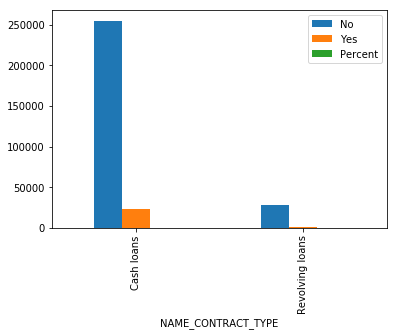

In [49]:
tab = pd.crosstab(index=application_train_data['NAME_CONTRACT_TYPE'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpreation:
Higher percentage of cash loans were approved compared to Revolving loans

### Analyze CODE_GENDER vs TARGET
* Create count of each type of CODE_GENDER
* Create a cross-tabulation graph between CODE_GENDER vs TARGET

In [113]:
application_bureau_loan_train_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

                 No    Yes    Percent
CODE_GENDER                          
F            188278  14170   6.999328
M             94404  10655  10.141920
XNA               4      0   0.000000


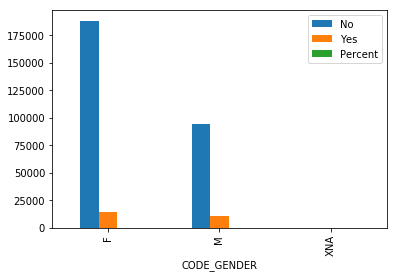

In [114]:
tab = pd.crosstab(index=application_train_data['CODE_GENDER'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

### Interpretation:
Almost simlar number of loans have been given to  Female and Male although percentage of males given loans is little higher than percentage of females So , I will drop CODE_GENDER as it does not seem to be imporatant field, another reason is I do not want algorithm to have any gender bias to be legally compliant

### Analyze FLAG_OWN_CAR vs TARGET
* Create count of each type of FLAG_OWN_CAR
* Create a cross-tabulation graph between FLAG_OWN_CAR vs TARGET

In [234]:
application_bureau_loan_train_data['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

                  No    Yes   Percent
FLAG_OWN_CAR                         
N             185675  17249  8.500227
Y              97011   7576  7.243730


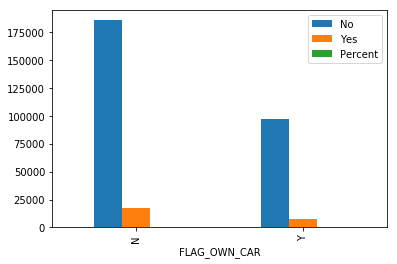

In [235]:
tab = pd.crosstab(index=application_train_data['FLAG_OWN_CAR'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [54]:
application_bureau_loan_train_data['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

                     No    Yes   Percent
FLAG_OWN_REALTY                         
N                 86357   7842  8.324929
Y                196329  16983  7.961577


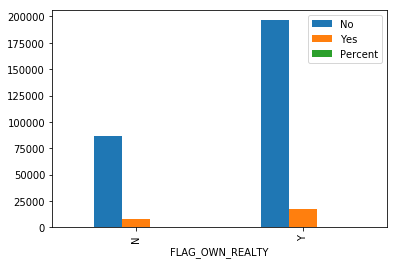

In [55]:
tab = pd.crosstab(index=application_train_data['FLAG_OWN_REALTY'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

### Interpreation:
FLAG_OWN_CAR  having 'Y' are givne more number of loans than 'N', although percenate of 'Y' given loan are similar to percentage of 'N' given loan

### Analyze CNT_CHILDREN vs TARGET
* Get count of each type of CODE_GENDER
* Create a cross-tabulation graph between CODE_GENDER vs TARGET

In [236]:
application_bureau_loan_train_data['CNT_CHILDREN'].value_counts()


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

                  No    Yes     Percent
CNT_CHILDREN                           
0             198762  16609    7.711809
1              55665   5454    8.923575
2              24416   2333    8.721821
3               3359    358    9.631423
4                374     55   12.820513
5                 77      7    8.333333
6                 15      6   28.571429
7                  7      0    0.000000
8                  2      0    0.000000
9                  0      2  100.000000
10                 2      0    0.000000
11                 0      1  100.000000
12                 2      0    0.000000
14                 3      0    0.000000
19                 2      0    0.000000


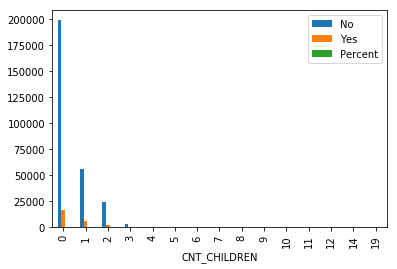

In [237]:
tab = pd.crosstab(index=application_bureau_loan_train_data['CNT_CHILDREN'],columns=application_bureau_loan_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

### Interpreation: 
CNT_CHILDREN 0, 1 and 2 have been given more of loans in that order.

### Histogram analysis of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

Draw histograms using fields AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITTY, AMT_GOODS_PRICE

If histograms are skewed or not normal, try log tranformation and check if it becomes normal

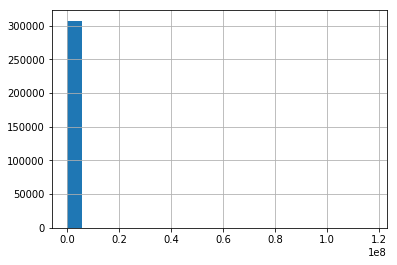

In [238]:
application_bureau_loan_train_data['AMT_INCOME_TOTAL'].hist(bins=20)
plt.show()

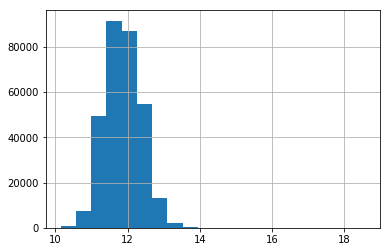

In [239]:
np.log(application_bureau_loan_train_data['AMT_INCOME_TOTAL'] + 1).hist(bins=20)
plt.show()

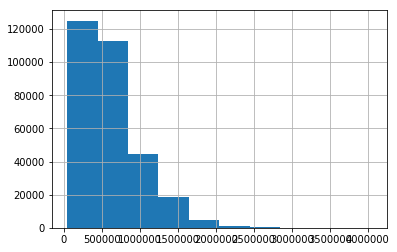

In [240]:
application_bureau_loan_train_data['AMT_CREDIT'].hist()
plt.show()

## Interpretation:
AMT_CREDIT is left skewed, we can do log transformation t ocheck if it becomes normal

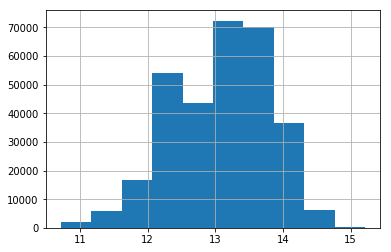

In [241]:
np.log(application_bureau_loan_train_data['AMT_CREDIT'] + 1).hist()
plt.show()

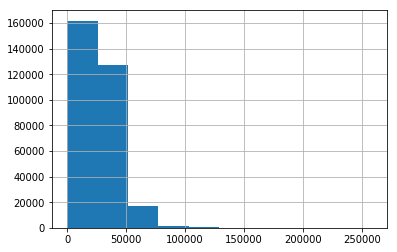

In [242]:
application_bureau_loan_train_data['AMT_ANNUITY'].hist()
plt.show()

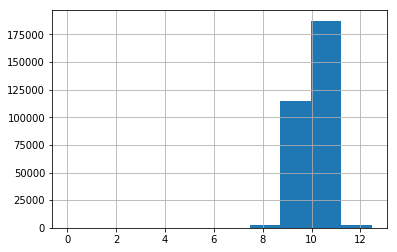

In [243]:
np.log(application_bureau_loan_train_data['AMT_ANNUITY'] + 1).hist()
plt.show()

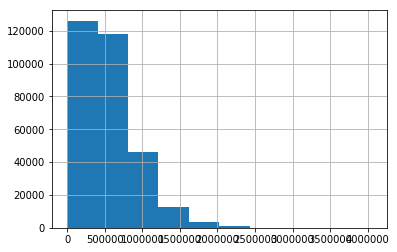

In [244]:
application_bureau_loan_train_data['AMT_GOODS_PRICE'].hist()
plt.show()

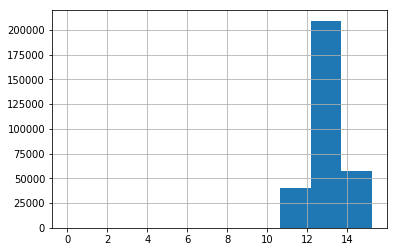

In [245]:
np.log(application_bureau_loan_train_data['AMT_GOODS_PRICE'] + 1).hist()
plt.show()

## Interpretation:  
AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITTY, AMT_GOODS_PRICE are not normal distrbiution as evident 
from teh histogram. But if we apply log transformation he histogram on thse fields become close to normal.

We will apply log transformation on fields 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' and create a new dataframe application_bureau_loan_train_data_log


###  Linear correlation analysis of fields:
TARGET, AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
* First calculate correlation coefficinets
* Draw the heatmap

Correlation coefficients are:
                    TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
TARGET            1.000000         -0.017830   -0.010122     0.002893        -0.006468
AMT_INCOME_TOTAL -0.017830          1.000000    0.419369     0.422166         0.161980
AMT_CREDIT       -0.010122          0.419369    1.000000     0.752855         0.367808
AMT_ANNUITY       0.002893          0.422166    0.752855     1.000000         0.290103
AMT_GOODS_PRICE  -0.006468          0.161980    0.367808     0.290103         1.000000


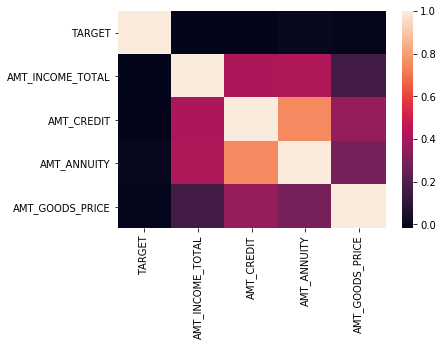

In [253]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation: 
From the heamap and correlation coefficients, found that AMT_ANNUITY is strongly dependent on AMT_CREDIT

Also, AMT_CREDIT, AMT_ANNUITY  is dependent on AMT_INCOME_TOTAL
Also, AMT_CREDIT is to some extent dependent on AMT_GOODS_PRICE.

I will drop the column AMT_ANNUITY

In [255]:
application_bureau_loan_train_data_log['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NA                   1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

                     No    Yes   Percent
NAME_TYPE_SUITE                         
Children           3026    241  7.376798
Family            37140   3009  7.494583
Group of people     248     23  8.487085
Other_A             790     76  8.775982
Other_B            1596    174  9.830508
Spouse, partner   10475    895  7.871592
Unaccompanied    228189  20337  8.183047


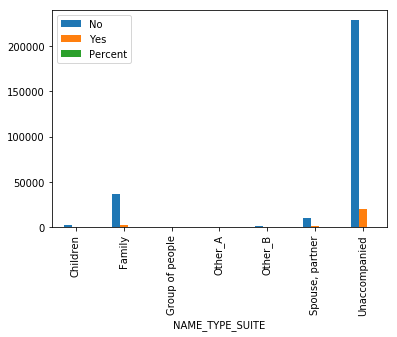

In [256]:
tab = pd.crosstab(index=application_train_data['NAME_TYPE_SUITE'],columns=application_train_data['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [257]:
application_bureau_loan_train_data_log['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

                          No    Yes    Percent
NAME_INCOME_TYPE                              
Businessman               10      0   0.000000
Commercial associate   66257   5360   7.484257
Maternity leave            3      2  40.000000
Pensioner              52380   2982   5.386366
State servant          20454   1249   5.754965
Student                   18      0   0.000000
Unemployed                14      8  36.363636
Working               143550  15224   9.588472


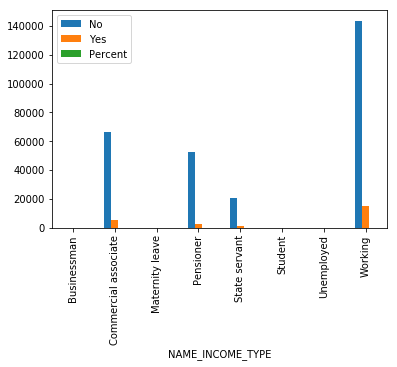

In [258]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['NAME_INCOME_TYPE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation:
Working has been given more number of loans

In [259]:
application_bureau_loan_train_data_log['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

                                   No    Yes    Percent
NAME_EDUCATION_TYPE                                    
Academic degree                   161      3   1.829268
Higher education                70854   4009   5.355115
Incomplete higher                9405    872   8.484966
Lower secondary                  3399    417  10.927673
Secondary / secondary special  198867  19524   8.939929


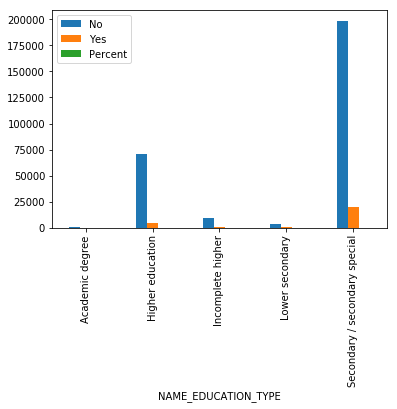

In [260]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['NAME_EDUCATION_TYPE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [261]:
application_bureau_loan_train_data_log['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

                          No    Yes   Percent
NAME_FAMILY_STATUS                           
Civil marriage         26814   2961  9.944584
Married               181582  14850  7.559868
Separated              18150   1620  8.194234
Single / not married   40987   4457  9.807675
Unknown                    2      0  0.000000
Widow                  15151    937  5.824217


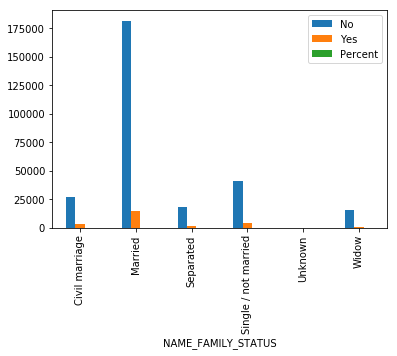

In [262]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['NAME_FAMILY_STATUS'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')


## Interpretation:
Married have been given more number of loans

In [263]:
application_bureau_loan_train_data_log['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

                         No    Yes    Percent
NAME_HOUSING_TYPE                            
Co-op apartment        1033     89   7.932264
House / apartment    251596  21272   7.795711
Municipal apartment   10228    955   8.539748
Office apartment       2445    172   6.572411
Rented apartment       4280    601  12.313051
With parents          13104   1736  11.698113


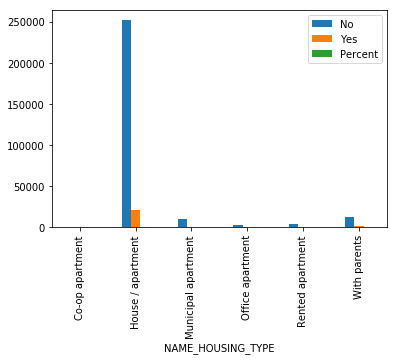

In [264]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['NAME_HOUSING_TYPE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation:
House/apartment have been given more loan than any other category

Correlation coefficients are:
                     TARGET  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE
TARGET             1.000000   -0.078239       0.044932          -0.041975        -0.051457   -0.173322
DAYS_BIRTH        -0.078239    1.000000      -0.615864           0.331912         0.272691    0.087817
DAYS_EMPLOYED      0.044932   -0.615864       1.000000          -0.210242        -0.272378    0.030691
DAYS_REGISTRATION -0.041975    0.331912      -0.210242           1.000000         0.101896    0.027263
DAYS_ID_PUBLISH   -0.051457    0.272691      -0.272378           0.101896         1.000000    0.092992
EXT_SOURCE        -0.173322    0.087817       0.030691           0.027263         0.092992    1.000000


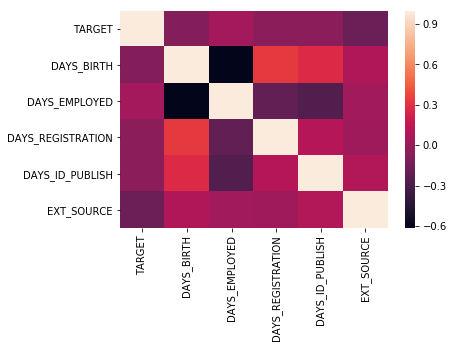

In [266]:
cor = application_bureau_loan_train_data_log[['TARGET','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation:

DAYS_BIRTH has strong linear relationship with DAYS_EMPLOYED,
DAYS_REGISTRATION, DAYS_ID_PUBLISH has some linear relationship with DAYS_BIRTH
TARGET has little relationship with EXT_SOURCE



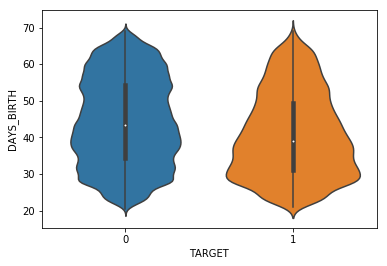

In [268]:
sns.violinplot(x='TARGET',y='DAYS_BIRTH',data=application_bureau_loan_train_data_log)
plt.show()

## Interpretation:

Most loans have been given around age 30 after that loan approval rate sequencially decreases


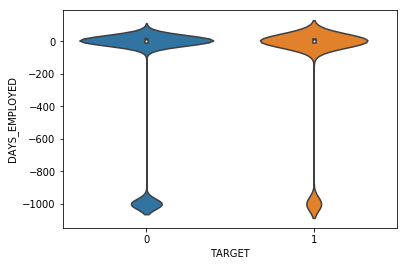

In [269]:
sns.violinplot(x='TARGET',y='DAYS_EMPLOYED',data=application_bureau_loan_train_data_log)
plt.show()

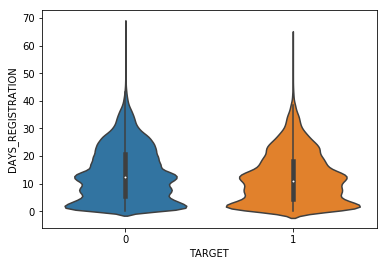

In [270]:
sns.violinplot(x='TARGET',y='DAYS_REGISTRATION',data=application_bureau_loan_train_data_log)
plt.show()

## Interpretation:
Interpretation: DAYS_REGISTRATION has strong linear relationship with TARGET

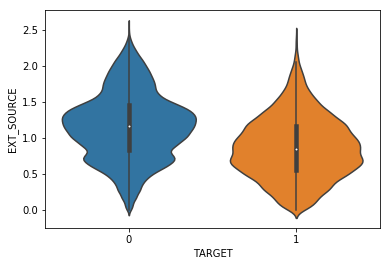

In [83]:
sns.violinplot(x='TARGET',y='EXT_SOURCE',data=application_bureau_loan_train_data_log)
plt.show()

## Interpretation:
Interpretation: EXT_SOURCE has relationship with TARGET

In [271]:
application_bureau_loan_train_data_log['OCCUPATION_TYPE'].value_counts()

NA                       96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

                          No   Yes    Percent
OCCUPATION_TYPE                              
Accountants             9339   474   4.830327
Cleaning staff          4206   447   9.606705
Cooking staff           5325   621  10.443996
Core staff             25832  1738   6.303954
Drivers                16496  2107  11.326130
HR staff                 527    36   6.394316
High skill tech staff  10679   701   6.159930
IT staff                 492    34   6.463878
Laborers               49348  5838  10.578770
Low-skill Laborers      1734   359  17.152413
Managers               20043  1328   6.214028
Medicine staff          7965   572   6.700246
NA                     90113  6278   6.513056
Private service staff   2477   175   6.598793
Realty agents            692    59   7.856192
Sales staff            29010  3092   9.631799
Secretaries             1213    92   7.049808
Security staff          5999   722  10.742449
Waiters/barmen staff    1196   152  11.275964


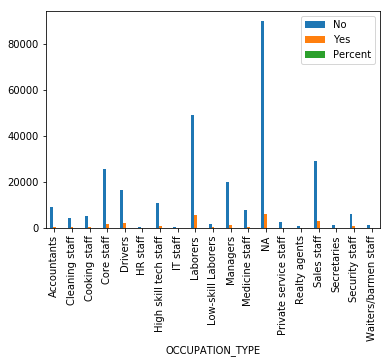

In [272]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['OCCUPATION_TYPE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

## Interpretation:

Laborers and NA have been given more loans


In [273]:
application_bureau_loan_train_data_log['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
0.0          2
20.0         2
16.0         2
12.0         2
14.0         2
15.0         1
13.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

                     No    Yes     Percent
CNT_FAM_MEMBERS                           
0.0                   2      0    0.000000
1.0               62172   5675    8.364408
2.0              146348  12009    7.583498
3.0               47993   4608    8.760290
4.0               22561   2136    8.648824
5.0                3151    327    9.401955
6.0                 353     55   13.480392
7.0                  75      6    7.407407
8.0                  14      6   30.000000
9.0                   6      0    0.000000
10.0                  2      1   33.333333
11.0                  0      1  100.000000
12.0                  2      0    0.000000
13.0                  0      1  100.000000
14.0                  2      0    0.000000
15.0                  1      0    0.000000
16.0                  2      0    0.000000
20.0                  2      0    0.000000


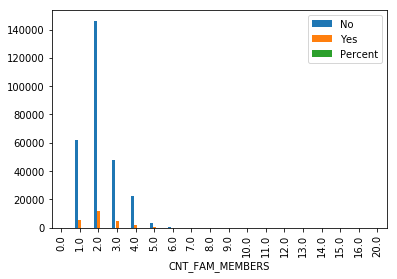

In [274]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['CNT_FAM_MEMBERS'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

Correlation coefficients are:
                        TARGET  AMT_CREDIT  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG
TARGET                1.000000   -0.010122        -0.033073       -0.020853      -0.035853      -0.049839      -0.034177     -0.023152             -0.029525
AMT_CREDIT           -0.010122    1.000000         0.044097        0.039327       0.068086       0.081633       0.058867      0.026208              0.049818
YEARS_BUILD_AVG      -0.033073    0.044097         1.000000        0.428953       0.357608       0.620825       0.759495      0.417323              0.661667
COMMONAREA_AVG       -0.020853    0.039327         0.428953        1.000000       0.480672       0.426768       0.468471      0.323363              0.616901
ELEVATORS_AVG        -0.035853    0.068086         0.357608        0.480672       1.000000       0.695423       0.492523      0.448520              0.660955
FLOORSMAX_AVG        -0.0498

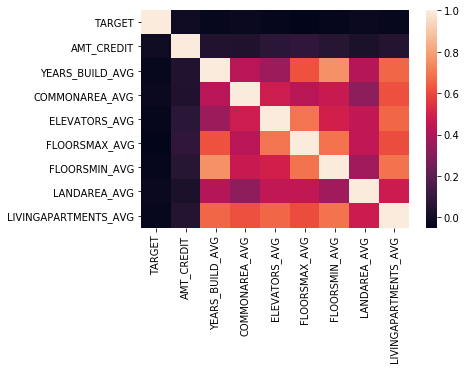

In [275]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT','YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation:

TARGET and CREDIT_AMOUNT  has no linear relationship with any other fields, 
LIVINGAPARTMENTS_AVG has strong linear relationship with YEARS_BUILD_AVG, COMMON_AREA_AVG, ELEVATORS_AVG, 
FLOOR_MIN_AVG,FLOOR_MAX_AVG,FLOORSMIN_AVG and medium relationship with LANDAREA_AVG. 

We will drop the columns COMMON_AREA_AVG, ELEVATORS_AVG,
FLOOR_MIN_AVG,FLOOR_MAX_AVG,FLOORSMIN_AVG 


Correlation coefficients are:
                               TARGET  AMT_CREDIT  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  LIVINGAPARTMENTS_AVG
TARGET                       1.000000   -0.010122       -0.039924         -0.033759                    -0.040965       -0.040301          -0.019446             -0.029525
AMT_CREDIT                  -0.010122    1.000000        0.062026          0.047030                     0.049162        0.066065           0.035985              0.049818
APARTMENTS_AVG              -0.039924    0.062026        1.000000          0.737313                     0.589120        0.916381           0.381249              0.759989
BASEMENTAREA_AVG            -0.033759    0.047030        0.737313          1.000000                     0.523454        0.737142           0.320550              0.633589
YEARS_BEGINEXPLUATATION_AVG -0.040965    0.049162        0.589120          0.523454                     1.000000        

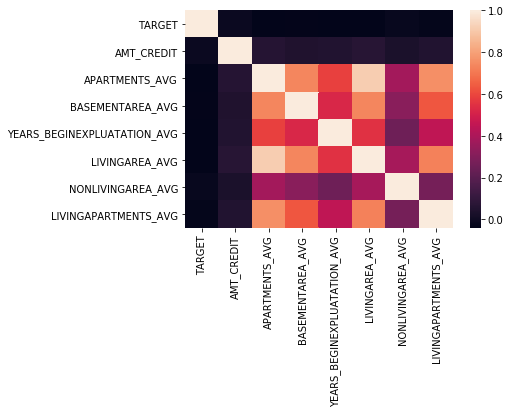

In [276]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'LIVINGAPARTMENTS_AVG']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)


## Interpretation:

LIVINGAPARTMENTS_AVG has strong linear relationship with APARTMENTS_AVG, BASEMENTAREA_AVG, LIVINGAREA_AVG

LIVINGAREA_AVG has very strong linear relationship with APARTMENTS_AVG

We can remove the columns APARTMENTS_AVG, BASEMENTAREA_AVG, LIVINGAREA_AVG



In [90]:
application_bureau_loan_train_data_log['HOUSETYPE_MODE'].value_counts()

NA                  154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

                      No    Yes    Percent
HOUSETYPE_MODE                            
NA                140177  14120   9.151182
block of flats    140053  10450   6.943383
specific housing    1347    152  10.140093
terraced house      1109    103   8.498350


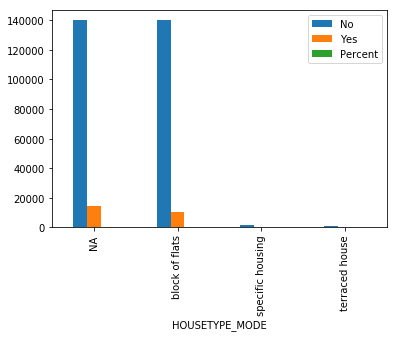

In [277]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['HOUSETYPE_MODE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [278]:
application_bureau_loan_train_data_log['TOTALAREA_MODE'].value_counts()

0.0000    149013
0.0570       247
0.0547       230
0.0550       227
0.0548       227
0.0555       227
0.0551       225
0.0554       220
0.0573       220
0.0566       219
0.0556       217
0.0559       216
0.0543       214
0.0529       212
0.0603       211
0.0552       208
0.0541       205
0.0689       205
0.0525       204
0.0064       204
0.0067       203
0.0500       203
0.0502       201
0.0017       200
0.0688       199
0.0066       198
0.0526       198
0.0540       197
0.0536       196
0.0687       195
0.0532       195
0.0569       194
0.0553       194
0.0538       194
0.0063       192
0.0528       192
0.0498       192
0.0607       190
0.0533       189
0.0018       189
0.0686       188
0.0546       188
0.0568       188
0.0558       187
0.0564       186
0.0531       185
0.0520       185
0.0423       185
0.0549       185
0.0019       184
0.0544       184
0.0530       184
0.0080       184
0.0545       184
0.0557       184
0.0572       183
0.0521       183
0.0503       183
0.0539       1

In [93]:
application_bureau_loan_train_data_log['FONDKAPREMONT_MODE'].value_counts()

NA                       210295
reg oper account          73830
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: FONDKAPREMONT_MODE, dtype: int64

                           No    Yes   Percent
FONDKAPREMONT_MODE                            
NA                     192170  18125  8.618845
not specified            5258    429  7.543520
org spec account         5292    327  5.819541
reg oper account        68678   5152  6.978193
reg oper spec account   11288    792  6.556291


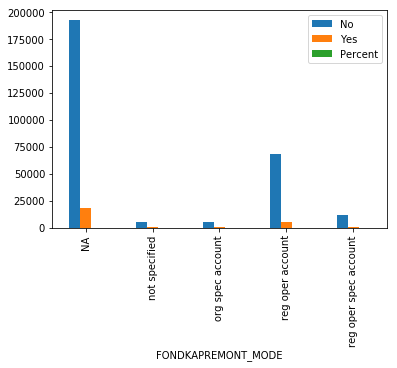

In [279]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['FONDKAPREMONT_MODE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [280]:
application_bureau_loan_train_data_log['WALLSMATERIAL_MODE'].value_counts()

NA              156341
Panel            66040
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [281]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['WALLSMATERIAL_MODE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
tab

,No,Yes,Percent
WALLSMATERIAL_MODE,,,
Block,8603,650,7.024749
Mixed,2123,173,7.534843
Monolithic,1695,84,4.721754
NA,142070,14271,9.128124
Others,1490,135,8.307692
Panel,61848,4192,6.347668
"Stone, brick",60015,4800,7.405693
Wooden,4842,520,9.697874


In [97]:
application_bureau_loan_train_data_log['EMERGENCYSTATE_MODE'].value_counts()

No     159428
NA     145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

                         No    Yes   Percent
EMERGENCYSTATE_MODE                         
NA                   132257  13498  9.260746
No                   148324  11104  6.964900
Yes                    2105    223  9.579038


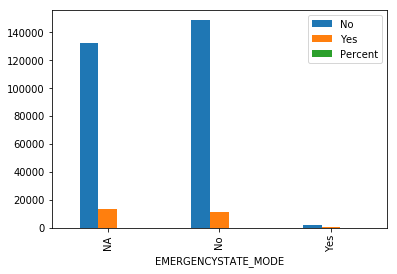

In [98]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['EMERGENCYSTATE_MODE'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [99]:
application_bureau_loan_train_data_log['FLAG_DOCUMENT_15'].value_counts()

0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64

                      No    Yes   Percent
FLAG_DOCUMENT_15                         
0                 282325  24814  8.079078
1                    361     11  2.956989


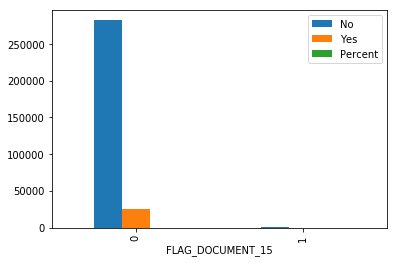

In [100]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['FLAG_DOCUMENT_15'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [101]:
application_bureau_loan_train_data_log['FLAG_DOCUMENT_16'].value_counts()

0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64

                      No    Yes   Percent
FLAG_DOCUMENT_16                         
0                 279783  24675  8.104566
1                   2903    150  4.913200


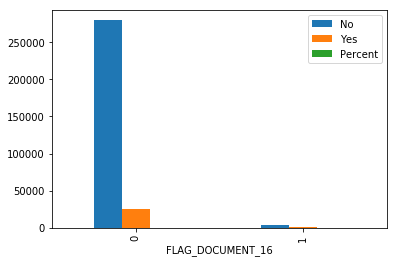

In [102]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['FLAG_DOCUMENT_16'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [103]:
application_bureau_loan_train_data_log['FLAG_DOCUMENT_17'].value_counts()

0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64

                      No    Yes   Percent
FLAG_DOCUMENT_17                         
0                 282606  24823  8.074385
1                     80      2  2.439024


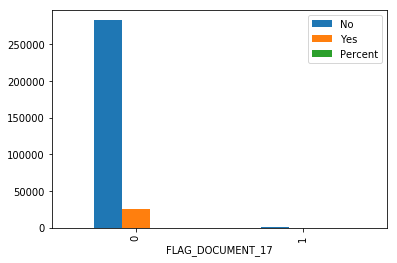

In [104]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['FLAG_DOCUMENT_17'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

In [105]:
application_bureau_loan_train_data_log['FLAG_DOCUMENT_18'].value_counts()

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64

                      No    Yes   Percent
FLAG_DOCUMENT_18                         
0                 280328  24683  8.092495
1                   2358    142  5.680000


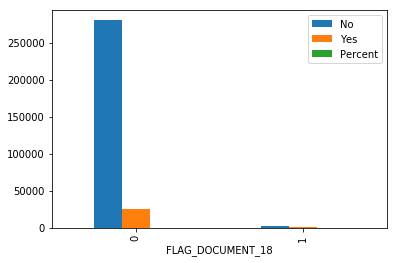

In [106]:
tab = pd.crosstab(index=application_bureau_loan_train_data_log['FLAG_DOCUMENT_18'],columns=application_bureau_loan_train_data_log['TARGET'])
tab.columns = ['No','Yes']
tab['Percent'] = tab.Yes/(tab.No+tab.Yes) * 100
print(tab)
tab.plot(kind='bar')

Correlation coefficients are:
                                 TARGET  AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE_ACTIVE  CNT_CREDIT_PROLONG_ACTIVE  AMT_CREDIT_SUM_ACTIVE  AMT_CREDIT_SUM_DEBT_ACTIVE  AMT_CREDIT_SUM_LIMIT_ACTIVE  AMT_CREDIT_SUM_OVERDUE_ACTIVE  AMT_ANNUITY_ACTIVE
TARGET                         1.000000   -0.012181                       0.020019                   0.006638              -0.005999                    0.001960                    -0.011996                       0.012892            0.006538
AMT_CREDIT                    -0.012181    1.000000                       0.021127                   0.014217               0.120972                    0.090657                     0.056987                      -0.001178            0.009148
AMT_CREDIT_MAX_OVERDUE_ACTIVE  0.020019    0.021127                       1.000000                   0.065078               0.120834                    0.043659                     0.039532                       0.163072            0.011538
CNT_CR

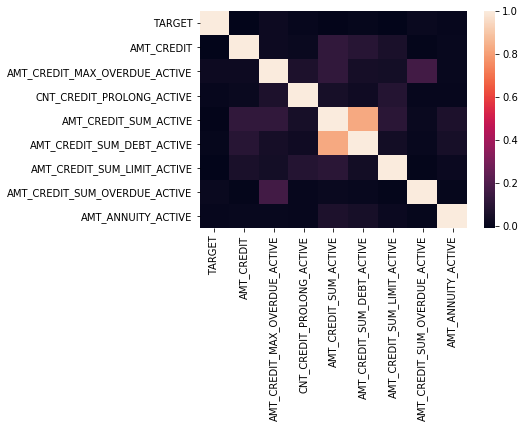

In [107]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT', 'AMT_CREDIT_MAX_OVERDUE_ACTIVE','CNT_CREDIT_PROLONG_ACTIVE','AMT_CREDIT_SUM_ACTIVE','AMT_CREDIT_SUM_DEBT_ACTIVE',
'AMT_CREDIT_SUM_LIMIT_ACTIVE','AMT_CREDIT_SUM_OVERDUE_ACTIVE','AMT_ANNUITY_ACTIVE']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)


## Interpretation:

Only AMT_CREDIT_SUM_ACTIVE has very strong linear relationship with AMT_CREDIT_SUM_DEBT_ACTIVE.
Other than that there is no almost no linear relationship between other varialbes


Correlation coefficients are:
                                 TARGET  AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE_CLOSED  CNT_CREDIT_PROLONG_CLOSED  AMT_CREDIT_SUM_CLOSED  AMT_CREDIT_SUM_DEBT_CLOSED  AMT_CREDIT_SUM_LIMIT_CLOSED  AMT_CREDIT_SUM_OVERDUE_CLOSED  AMT_ANNUITY_CLOSED
TARGET                         1.000000   -0.012181                       0.000128                  -0.006475              -0.020238                   -0.001044                    -0.001038                      -0.000235           -0.002010
AMT_CREDIT                    -0.012181    1.000000                       0.006428                   0.018753               0.085200                    0.019467                     0.016404                       0.000228            0.006602
AMT_CREDIT_MAX_OVERDUE_CLOSED  0.000128    0.006428                       1.000000                   0.006670               0.053115                    0.000094                     0.004159                       0.000100            0.001593
CNT_CR

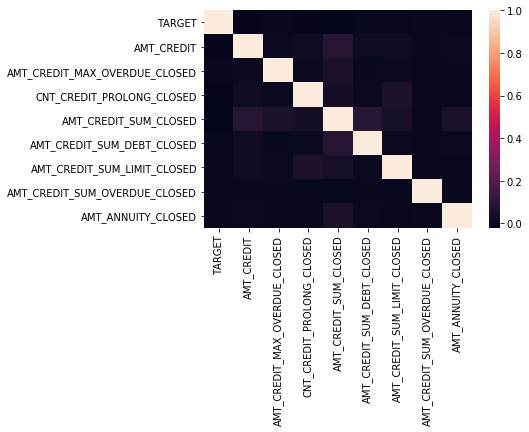

In [108]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT', 'AMT_CREDIT_MAX_OVERDUE_CLOSED','CNT_CREDIT_PROLONG_CLOSED','AMT_CREDIT_SUM_CLOSED','AMT_CREDIT_SUM_DEBT_CLOSED',
'AMT_CREDIT_SUM_LIMIT_CLOSED','AMT_CREDIT_SUM_OVERDUE_CLOSED','AMT_ANNUITY_CLOSED']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)


## Interpretation:

There is almost no relationship between any pair of columns


Correlation coefficients are:
                                   TARGET  AMT_CREDIT  AMT_CREDIT_MAX_OVERDUE_BAD_DEBT  CNT_CREDIT_PROLONG_BAD_DEBT  AMT_CREDIT_SUM_BAD_DEBT  AMT_CREDIT_SUM_DEBT_BAD_DEBT  AMT_CREDIT_SUM_LIMIT_BAD_DEBT  AMT_CREDIT_SUM_OVERDUE_BAD_DEBT  AMT_ANNUITY_BAD_DEBT
TARGET                           1.000000   -0.012181                         0.006409                     0.006085                 0.004161                      0.003411                      -0.005121                        -0.000278             -0.000534
AMT_CREDIT                      -0.012181    1.000000                        -0.003127                    -0.001882                -0.002201                     -0.002486                       0.001877                         0.000185              0.000326
AMT_CREDIT_MAX_OVERDUE_BAD_DEBT  0.006409   -0.003127                         1.000000                     0.132931                 0.567926                      0.453370                      -0.5830

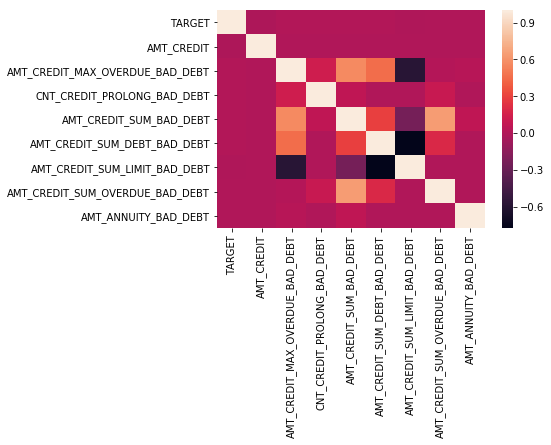

In [109]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT', 'AMT_CREDIT_MAX_OVERDUE_BAD_DEBT','CNT_CREDIT_PROLONG_BAD_DEBT','AMT_CREDIT_SUM_BAD_DEBT','AMT_CREDIT_SUM_DEBT_BAD_DEBT',
'AMT_CREDIT_SUM_LIMIT_BAD_DEBT','AMT_CREDIT_SUM_OVERDUE_BAD_DEBT','AMT_ANNUITY_BAD_DEBT']].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)


## Interpretation:

AMT_CREDIT_SUM_LIMIT_BAD_DEBT has strong relationship with AMT_CREDIT_SUM_BAD_DEBT

Correlation coefficients are:
              TARGET  AMT_CREDIT    Active  Bad_debt    Closed      Sold
TARGET      1.000000   -0.012181  0.043569  0.003531 -0.037233  0.009347
AMT_CREDIT -0.012181    1.000000  0.061461 -0.003743  0.056674  0.007242
Active      0.043569    0.061461  1.000000  0.008212  0.455955  0.070171
Bad_debt    0.003531   -0.003743  0.008212  1.000000  0.002678  0.012759
Closed     -0.037233    0.056674  0.455955  0.002678  1.000000  0.084678
Sold        0.009347    0.007242  0.070171  0.012759  0.084678  1.000000


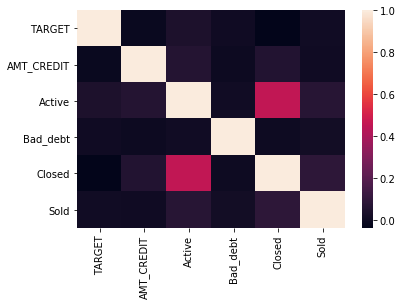

In [110]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT','Active', 'Bad_debt','Closed','Sold' ]].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)


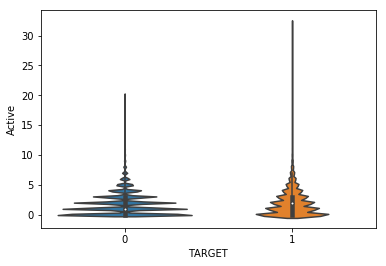

In [111]:
sns.violinplot(x='TARGET',y='Active',data=application_bureau_loan_train_data_log)
plt.show()

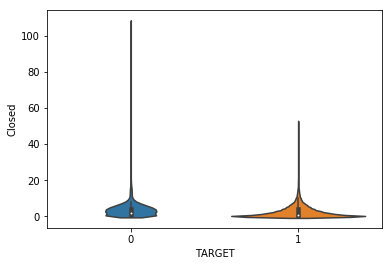

In [112]:
sns.violinplot(x='TARGET',y='Closed',data=application_bureau_loan_train_data_log)
plt.show()

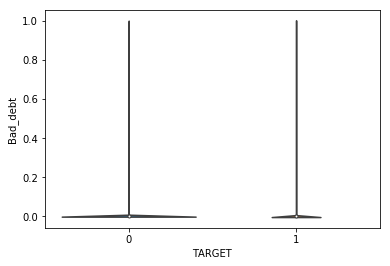

In [113]:
sns.violinplot(x='TARGET',y='Bad_debt',data=application_bureau_loan_train_data_log)
plt.show()

In [114]:
application_bureau_loan_train_data_log.groupby('TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA,EXT_SOURCE
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278244.744536,0.412946,11.911923,13.07269,10.067121,12.953455,0.021021,44.214182,-179.989441,13.780660,8.266356,4.095778,0.999996,0.814653,0.195991,0.998129,0.2

In [115]:
application_bureau_loan_train_data_log.groupby('TARGET').median()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA,EXT_SOURCE
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278362.5,0.0,11.908347,13.157323,10.121699,13.017005,0.018850,43.498630,3.383562,12.449315,9.027397,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0

Correlation coefficients are:
                   TARGET  AMT_CREDIT  CASH_LOANS  CONSUMER_LOANS  REVOLVING_LOANS       XNA
TARGET           1.000000   -0.012181    0.024765       -0.014818         0.046637  0.012869
AMT_CREDIT      -0.012181    1.000000   -0.012592       -0.011646        -0.020183 -0.007261
CASH_LOANS       0.024765   -0.012592    1.000000        0.081205         0.273391  0.019134
CONSUMER_LOANS  -0.014818   -0.011646    0.081205        1.000000         0.099303  0.011974
REVOLVING_LOANS  0.046637   -0.020183    0.273391        0.099303         1.000000  0.024859
XNA              0.012869   -0.007261    0.019134        0.011974         0.024859  1.000000


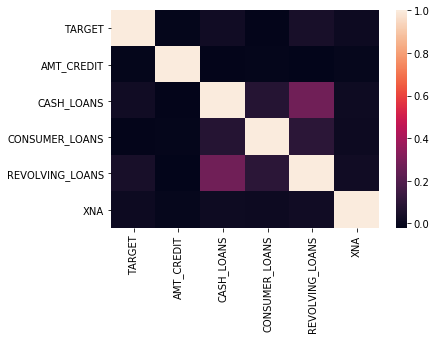

In [116]:
cor = application_bureau_loan_train_data_log[['TARGET','AMT_CREDIT','CASH_LOANS', 'CONSUMER_LOANS','REVOLVING_LOANS','XNA' ]].corr()
print( "Correlation coefficients are:")
print(str(cor))

sns.heatmap(cor)

## Interpretation:

CASH_LOANS has linear relationship with REVOLVING_LOANS

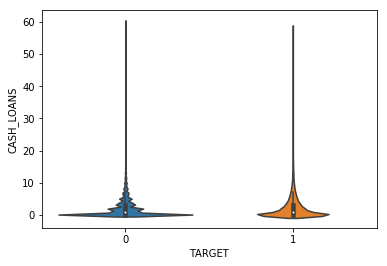

In [117]:
sns.violinplot(x='TARGET',y='CASH_LOANS',data=application_bureau_loan_train_data_log)
plt.show()

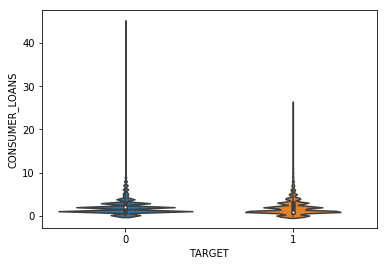

In [118]:
sns.violinplot(x='TARGET',y='CONSUMER_LOANS',data=application_bureau_loan_train_data_log)
plt.show()

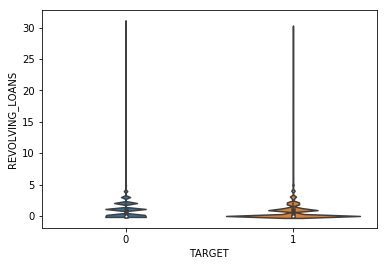

In [119]:
sns.violinplot(x='TARGET',y='REVOLVING_LOANS',data=application_bureau_loan_train_data_log)
plt.show()

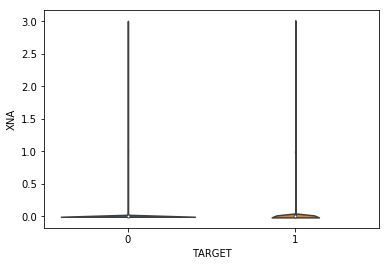

In [120]:
sns.violinplot(x='TARGET',y='XNA',data=application_bureau_loan_train_data_log)
plt.show()

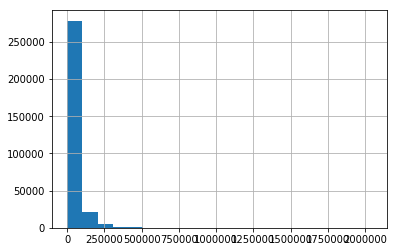

In [121]:
application_bureau_loan_train_data['PREV_CASH_AMT_ANNUITY'].hist(bins=20)
plt.show()

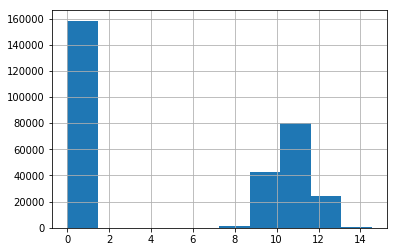

In [122]:
np.log(application_bureau_loan_train_data['PREV_CASH_AMT_ANNUITY'] + 1).hist()
plt.show()

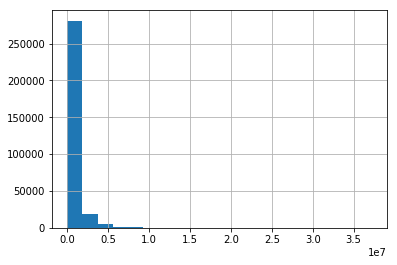

In [123]:
application_bureau_loan_train_data['PREV_CASH_AMT_APPLICATION'].hist(bins=20)
plt.show()

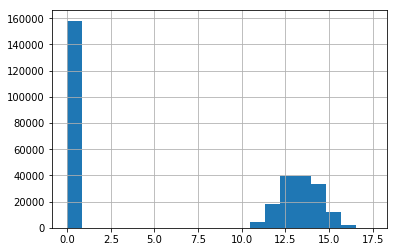

In [124]:
np.log(application_bureau_loan_train_data['PREV_CASH_AMT_APPLICATION'] + 1).hist(bins=20)
plt.show()

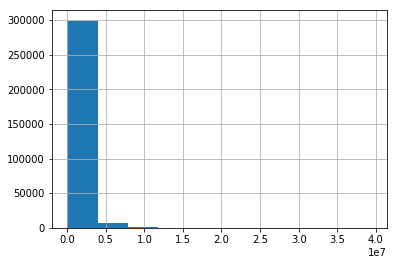

In [125]:
application_bureau_loan_train_data['PREV_CASH_AMT_CREDIT'].hist()
plt.show()

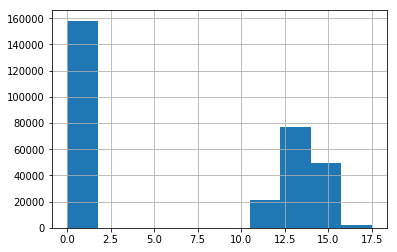

In [126]:
np.log(application_bureau_loan_train_data['PREV_CASH_AMT_CREDIT'] +1).hist()
plt.show()

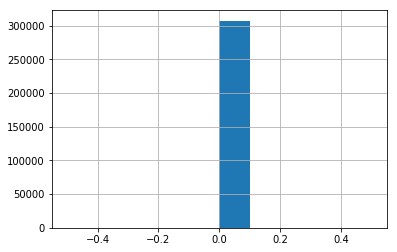

In [127]:
application_bureau_loan_train_data['PREV_CASH_AMT_DOWN_PAYMENT'].hist()
plt.show()


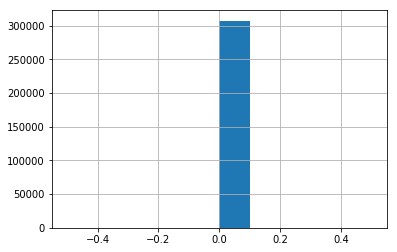

In [128]:
np.log(application_bureau_loan_train_data['PREV_CASH_AMT_DOWN_PAYMENT'] + 1).hist()
plt.show()

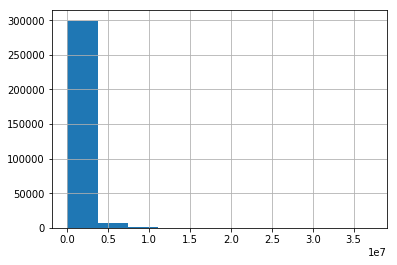

In [129]:
application_bureau_loan_train_data['PREV_CASH_AMT_GOODS_PRICE'].hist()
plt.show()

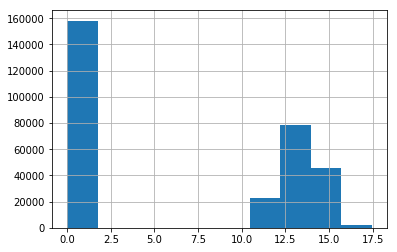

In [130]:
np.log(application_bureau_loan_train_data['PREV_CASH_AMT_GOODS_PRICE'] + 1).hist()
plt.show()

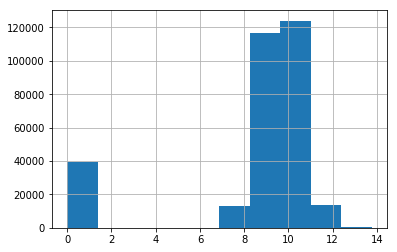

In [131]:
np.log(application_bureau_loan_train_data['PREV_CONSUMER_AMT_ANNUITY'] + 1).hist()
plt.show()

## Field Transformations

i. Logarithmic Transformation:
For highly-skewed feature distributions such as AMT_INCOME_TOTAL', 'AMT_CREDIT', logarithmic transformation is done on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

ii. Normalizing Numerical Features

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as  AMT_INCOME_TOTAL', 'AMT_CREDIT' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

iii.One hot encoding for categorical features
Categorical variables having more than two possible vlaues are encoded using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

iv. Label Encoding:
Categorical variables having more than two possible are encoded using Label Encode to have values 0 and 1

v. Drop not relevant fields:

Some of the fields are not relevant for this project, this is based on analysis, intuitions and domain knowlege are dropped



Refrences: Udacity my earlier project on Finding donors https://github.com/monimoyd/finding_donors/blob/master/finding_donors.ipynb

In [49]:
# Perform log transformation
log_transform_fields = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','PREV_CASH_AMT_ANNUITY',
                       'PREV_CASH_AMT_APPLICATION', 'PREV_CASH_AMT_CREDIT', 'PREV_CASH_AMT_DOWN_PAYMENT', 
                       'PREV_CASH_AMT_GOODS_PRICE', 'PREV_CONSUMER_AMT_ANNUITY', 'PREV_CONSUMER_AMT_APPLICATION',
                       'PREV_CONSUMER_AMT_CREDIT', 'PREV_CONSUMER_AMT_DOWN_PAYMENT', 'PREV_CONSUMER_AMT_GOODS_PRICE',
                       'PREV_REVOVING_AMT_ANNUITY', 'PREV_REVOLVING_AMT_APPLICATION', 'PREV_REVOLVING_AMT_CREDIT', 
                       'PREV_REVOVING_AMT_DOWN_PAYMENT', 'PREV_REVOVING_AMT_GOODS_PRICE', 'PREV_XNA_AMT_ANNUITY',
                       'PREV_XNA_AMT_APPLICATION', 'PREV_XNA_AMT_CREDIT',   'PREV_XNA_AMT_DOWN_PAYMENT',
                       'PREV_XNA_AMT_GOODS_PRICE']
train_data = pd.DataFrame(data = application_bureau_loan_train_data)
train_data[log_transform_fields] = application_bureau_loan_train_data[log_transform_fields].apply(lambda x: np.log(x + 1))

test_data = pd.DataFrame(data = application_bureau_loan_test_data)
test_data[log_transform_fields] = application_bureau_loan_test_data[log_transform_fields].apply(lambda x: np.log(x + 1))

In [50]:
days_transform_fields = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
temp1 = pd.DataFrame(data = train_data)
temp1[days_transform_fields] = train_data[days_transform_fields].apply(lambda x: -1.0 * x/365.0)
train_data = temp1

temp2 = pd.DataFrame(data = test_data)
temp2[days_transform_fields] = test_data[days_transform_fields].apply(lambda x: -1.0 * x/365.0)
test_data = temp2

In [169]:
train_data['EXT_SOURCE'] = train_data['EXT_SOURCE_1'] + train_data['EXT_SOURCE_2'] +  train_data['EXT_SOURCE_3']
test_data['EXT_SOURCE'] = test_data['EXT_SOURCE_1'] + test_data['EXT_SOURCE_2'] +  test_data['EXT_SOURCE_3']

In [52]:
# Drop fields which are not very relevant
drop_fields = ['CODE_GENDER','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','FLAG_MOBIL',
               'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','COMMONAREA_AVG', 
               'ELEVATORS_AVG','FLOORSMIN_AVG','FLOORSMAX_AVG','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'LIVINGAREA_AVG',
               'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
               'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
               'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
               'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
               'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
               'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
               'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3', 'AMT_ANNUITY']

# drop columns from train_data
train_data.drop(drop_fields, axis=1, inplace=True)

# drop columns from test_data
test_data.drop(drop_fields, axis=1, inplace=True)

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

numerical = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
'YEARS_CREDIT_ACTIVE','CREDIT_YEAR_OVERDUE_ACTIVE','YEARS_CREDIT_ENDDATE_ACTIVE','YEARS_ENDDATE_FACT_ACTIVE',
'AMT_CREDIT_MAX_OVERDUE_ACTIVE','AMT_CREDIT_SUM_ACTIVE','AMT_CREDIT_SUM_DEBT_ACTIVE','AMT_CREDIT_SUM_LIMIT_ACTIVE',
'AMT_CREDIT_SUM_OVERDUE_ACTIVE','AMT_ANNUITY_ACTIVE','YEARS_CREDIT_CLOSED','CREDIT_YEAR_OVERDUE_CLOSED',
'YEARS_CREDIT_ENDDATE_CLOSED','YEARS_ENDDATE_FACT_CLOSED','AMT_CREDIT_MAX_OVERDUE_CLOSED','CNT_CREDIT_PROLONG_CLOSED',
'AMT_CREDIT_SUM_CLOSED','AMT_CREDIT_SUM_DEBT_CLOSED','AMT_CREDIT_SUM_LIMIT_CLOSED','AMT_CREDIT_SUM_OVERDUE_CLOSED',
'AMT_ANNUITY_CLOSED','YEARS_CREDIT_SOLD','CREDIT_YEAR_OVERDUE_SOLD','YEARS_CREDIT_ENDDATE_SOLD','YEARS_ENDDATE_FACT_SOLD',
'AMT_CREDIT_MAX_OVERDUE_SOLD','CNT_CREDIT_PROLONG_SOLD','AMT_CREDIT_SUM_SOLD','AMT_CREDIT_SUM_DEBT_SOLD',
'AMT_CREDIT_SUM_LIMIT_SOLD','AMT_CREDIT_SUM_OVERDUE_SOLD','AMT_ANNUITY_SOLD','YEARS_CREDIT_BAD_DEBT',
'CREDIT_YEAR_OVERDUE_BAD_DEBT','YEARS_CREDIT_ENDDATE_BAD_DEBT','YEARS_ENDDATE_FACT_BAD_DEBT','AMT_CREDIT_MAX_OVERDUE_BAD_DEBT',
'CNT_CREDIT_PROLONG_BAD_DEBT','AMT_CREDIT_SUM_BAD_DEBT','AMT_CREDIT_SUM_DEBT_BAD_DEBT','AMT_CREDIT_SUM_LIMIT_BAD_DEBT',
'AMT_CREDIT_SUM_OVERDUE_BAD_DEBT','AMT_ANNUITY_BAD_DEBT',
'PREV_CASH_AMT_ANNUITY','PREV_CASH_AMT_APPLICATION','PREV_CASH_AMT_CREDIT','PREV_CASH_AMT_DOWN_PAYMENT','PREV_CASH_AMT_GOODS_PRICE',
'PREV_CONSUMER_AMT_ANNUITY','PREV_CONSUMER_AMT_APPLICATION','PREV_CONSUMER_AMT_CREDIT','PREV_CONSUMER_AMT_DOWN_PAYMENT',
'PREV_CONSUMER_AMT_GOODS_PRICE','PREV_REVOVING_AMT_ANNUITY','PREV_REVOLVING_AMT_APPLICATION','PREV_REVOLVING_AMT_CREDIT',
'PREV_REVOVING_AMT_DOWN_PAYMENT','PREV_REVOVING_AMT_GOODS_PRICE','PREV_XNA_AMT_ANNUITY','PREV_XNA_AMT_APPLICATION',
'PREV_XNA_AMT_CREDIT','PREV_XNA_AMT_DOWN_PAYMENT','PREV_XNA_AMT_GOODS_PRICE','EXT_SOURCE']

temp1 = pd.DataFrame(data = train_data)
temp1[numerical] = scaler.fit_transform( train_data[numerical])
train_data = temp1

temp2 = pd.DataFrame(data = test_data)
temp2[numerical] = scaler.fit_transform( test_data[numerical])
test_data = temp2

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

label_count1 = 0
for i in train_data:
    if  train_data[i].dtype=='object':
        if len(list(train_data[i].unique())) <=2:
            label_encoder1.fit(train_data[i])
            train_data[i]=label_encoder1.transform(train_data[i])
        label_count1 +=1
print('%d columns of train_data are encoded.'%label_count1)

label_count2 = 0
for i in test_data:
    if  test_data[i].dtype=='object':
        if len(list(test_data[i].unique())) <=2:
            label_encoder2.fit(test_data[i])
            test_data[i]=label_encoder2.transform(test_data[i])
        label_count2 +=1
print('%d columns of test_data are encoded.'%label_count2)

14 columns of train_data are encoded.
14 columns of test_data are encoded.


In [55]:

#  One-hot encode the 'train_data' data using pandas.get_dummies()
categorical = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',
'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

train_data = pd.get_dummies(data = train_data, columns = categorical)

#  One-hot encode the 'test_data' data using pandas.get_dummies()
categorical = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',
'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

#features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
test_data = pd.get_dummies(data = test_data, columns = categorical)

In [56]:
train_data.drop(['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown'], axis=1, inplace=True)

In [57]:
# Drop the fields TARGET, SK_ID_CURR from train_data to create dataframe train_data_x
train_data_x = train_data.drop(['TARGET', 'SK_ID_CURR'], axis=1)

# Get only filed TARGET to create dataframe train_data_y
train_data_y = train_data['TARGET']

In [58]:
train_data_x.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ENTRANCES_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,TOTALAREA_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA,EXT_SOURCE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_NA,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_NA,OCCUPATION_TYPE_Private service staff,OCCUPAT

In [59]:
train_data_y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [60]:
# Remove SK_ID_CURR field from test_data to create dataframe test_data_x which will be used for final validation for Kaggle
test_data_x = test_data.drop([ 'SK_ID_CURR'], axis=1)

# Get SK_ID_CURR from test_data to create dataframe test_data_id which will be used for final validation for Kaggle
test_data_id = test_data['SK_ID_CURR']


In [61]:
test_data_x.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ENTRANCES_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,TOTALAREA_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,YEARS_CREDIT_ACTIVE,CREDIT_YEAR_OVERDUE_ACTIVE,YEARS_CREDIT_ENDDATE_ACTIVE,YEARS_ENDDATE_FACT_ACTIVE,AMT_CREDIT_MAX_OVERDUE_ACTIVE,CNT_CREDIT_PROLONG_ACTIVE,AMT_CREDIT_SUM_ACTIVE,AMT_CREDIT_SUM_DEBT_ACTIVE,AMT_CREDIT_SUM_LIMIT_ACTIVE,AMT_CREDIT_SUM_OVERDUE_ACTIVE,AMT_ANNUITY_ACTIVE,YEARS_CREDIT_CLOSED,CREDIT_YEAR_OVERDUE_CLOSED,YEARS_CREDIT_ENDDATE_CLOSED,YEARS_ENDDATE_FACT_CLOSED,AMT_CREDIT_MAX_OVERDUE_CLOSED,CNT_CREDIT_PROLONG_CLOSED,AMT_CREDIT_SUM_CLOSED,AMT_CREDIT_SUM_DEBT_CLOSED,AMT_CREDIT_SUM_LIMIT_CLOSED,AMT_CREDIT_SUM_OVERDUE_CLOSED,AMT_ANNUITY_CLOSED,YEARS_CREDIT_SOLD,CREDIT_YEAR_OVERDUE_SOLD,YEARS_CREDIT_ENDDATE_SOLD,YEARS_ENDDATE_FACT_SOLD,AMT_CREDIT_MAX_OVERDUE_SOLD,CNT_CREDIT_PROLONG_SOLD,AMT_CREDIT_SUM_SOLD,AMT_CREDIT_SUM_DEBT_SOLD,AMT_CREDIT_SUM_LIMIT_SOLD,AMT_CREDIT_SUM_OVERDUE_SOLD,AMT_ANNUITY_SOLD,YEARS_CREDIT_BAD_DEBT,CREDIT_YEAR_OVERDUE_BAD_DEBT,YEARS_CREDIT_ENDDATE_BAD_DEBT,YEARS_ENDDATE_FACT_BAD_DEBT,AMT_CREDIT_MAX_OVERDUE_BAD_DEBT,CNT_CREDIT_PROLONG_BAD_DEBT,AMT_CREDIT_SUM_BAD_DEBT,AMT_CREDIT_SUM_DEBT_BAD_DEBT,AMT_CREDIT_SUM_LIMIT_BAD_DEBT,AMT_CREDIT_SUM_OVERDUE_BAD_DEBT,AMT_ANNUITY_BAD_DEBT,Active,Bad_debt,Closed,Sold,PREV_CASH_AMT_ANNUITY,PREV_CASH_AMT_APPLICATION,PREV_CASH_AMT_CREDIT,PREV_CASH_AMT_DOWN_PAYMENT,PREV_CASH_AMT_GOODS_PRICE,PREV_CONSUMER_AMT_ANNUITY,PREV_CONSUMER_AMT_APPLICATION,PREV_CONSUMER_AMT_CREDIT,PREV_CONSUMER_AMT_DOWN_PAYMENT,PREV_CONSUMER_AMT_GOODS_PRICE,PREV_REVOVING_AMT_ANNUITY,PREV_REVOLVING_AMT_APPLICATION,PREV_REVOLVING_AMT_CREDIT,PREV_REVOVING_AMT_DOWN_PAYMENT,PREV_REVOVING_AMT_GOODS_PRICE,PREV_XNA_AMT_ANNUITY,PREV_XNA_AMT_APPLICATION,PREV_XNA_AMT_CREDIT,PREV_XNA_AMT_DOWN_PAYMENT,PREV_XNA_AMT_GOODS_PRICE,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA,EXT_SOURCE,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_NA,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_NA,OCCUPATION_TYPE_Private service staff,OCCUPAT

In [62]:
test_data_id.head()

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: int64

In [63]:
# Check if there is any field which is there in train_data_x but not in test_data_x and vice versa
train_col_set = set(train_data_x.columns.values.tolist())
test_col_set = set(test_data_x.columns.values.tolist())

train_minus_test_list = list(train_col_set - test_col_set)
test_minus_train_list = list(test_col_set - train_col_set)

In [72]:
train_minus_test_list

[]

In [73]:
test_minus_train_list

[]

## Cross Validation

Split the train_data_x and train_data_y into 70% into training dataframes X_train,y_train and 30% to Test dataframes X_test,y_test

In [64]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data_x, 
                                                    train_data_y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 215257 samples.
Testing set has 92254 samples.


In [66]:
X_train.shape

(215257, 250)

In [67]:
y_train.shape

(215257,)

In [68]:
X_test.shape

(92254, 250)

In [75]:
y_test.shape

(92254,)

## Naive Predictor Performace

The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place we could start from.

In [69]:
TP = np.sum(y_train) # Counting the ones as this is the naive case.

FP = y_train.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

#  Calculate accuracy, precision and recall
accuracy = float(TP + TN)/float(TP + FP + TN + FN)
recall = float(TP)/float(TP + FN)
precision = float(TP)/float(TP + FP)

#  Calculate f1_score.
f1_score_value = float(2.0 * accuracy * recall/(accuracy + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, f1_score_value))


Naive Predictor: [Accuracy score: 0.0812, F-score: 0.1503]


## Apply Supervised Machine Learning Models

The following six supervised learning models that are currently available in scikit-learn are used to train the data:
    
i. Decision Trees: Decision tree is used for prediction and assessing the relative importance of variables. 
for the current problem we will need to do prediction for home loan, decision tree can be used

ii. Logistic Regression:  logistic regression is a simple model moves with non-linear function hence can work with linearly and
       non-linearly separable problems

iii. Gaussian Naive Bayes (GaussianNB): Gaussian Naive Bayes is a simple but powerful algorithm for predictive modeling suitable for current problem as we are predicting 

iv.  Gradient Boosting: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

Most Kaggle competition winners use stack/ensemble of various models as it gives good performance, this is because it reduces both bias and variance. As currently problem is also from Kaggle so Gradient boosting is suitable for this.

v. XGB Boosting: XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

vi. Random Forest: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees



Note: I have first tried first 3 models and next tried last 3 models to take advantage of existing framework created by Udacity

The model which best ROC-AUC score but satisfactory Accuracy score and also capable of generating actual probability using 
predict_proba will be chosen


Note: I have used some of the works from my previous finding_donors Udacity project:
http://localhost:8888/notebooks/finding_donors-master/finding_donors-master/finding_donors.ipynb

References:
https://en.wikipedia.org/wiki/Gradient_boosting
https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
https://en.wikipedia.org/wiki/Random_forest






In [ ]:
## Metrics used for evaluating models:

ROC-AUC score: An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification
model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate. 
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
        recall  =  (true positives )/(true positives + false negatives)
      
An ROC curve plots TPR vs. FPR at different classification thresholds.  AUC stands for "Area under the ROC Curve." That is,
AUC measures the entire two dimensional area underneath the entire ROC curve. AUC ranges in value from
0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose   predictions are 100% correct has an AUC of 1.0.
This Kaggle competition is judged based on ROC-AUC score, so I will be using this  Score for optimization.

However, I will also calculate Accuracy and F1-score for completeness and for Comparing models
       
Accuracy: Accuracy   is a common metric for binary classifiers. It takes into account both true positives and true negatives with equal weight. 
         accuracy  =  (true positives + true negatives)/dataset size
        
Precision: 
        precision  =  (true positives )/(true positives + false positive)
Recall: 
        recall  =  (true positives )/(true positives + false negatives)
        
F1-score: 
     F1-score  =  2*(precision * recall )/(precision + recall)
        
After training is done , the main metrics that will be used for selection is ROC-AUC score. Although Accuracy score and F1-score,
training and are calculated for each model.
        

Reference:
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc



In [70]:
#  Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner
    print( "Doing learner.fit")
    learner.fit(X_train, y_train)
    end = time() # Get end time
    print ("Done learner.fit")
    
    #  Calculate the training time
    results['train_time'] = end - start
    print( "training time=" + str(results['train_time']))
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    print ("Doing learner.predict X_test")
    predictions_test = learner.predict(X_test)
    print( "Doing learner.predict X_train 300 samples")
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end - start
    print("prediction time=" + str(results['pred_time']))
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    print( "Calculating accuracy_score")
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
    print("accuracy_score on 300 samples of training data=" + str(results['acc_train']))
           
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    print( "accuracy_score on test data=" + str(results['acc_test']))
    
    #  Compute F1-score on the the first 300 training samples using f1_score()
    print ("Calculating f1_score")
    results['f_train'] = f1_score( y_train[:300],predictions_train)
    print ("f1_score on 300 samples of training data=" + str(results['f_train']))
            
    #  Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test)
    print ("f1_score on test data=" + str(results['f_test']))
    
     #  Compute F1-score on the the first 300 training samples using f1_score()
    print ("Calculating f1_score")
    results['roc_auc_score_train'] = roc_auc_score( y_train[:300],predictions_train)
    print ("roc_auc_score on 300 samples of training data=" + str(results['roc_auc_score_train']))
    
    results['roc_auc_score_test'] = roc_auc_score( y_test, predictions_test)
    print ("roc_auc_score on test data=" + str(results['roc_auc_score_test']))
          
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [71]:
# Import the three supervised learning models from sklearn
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs
from sklearn import tree
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the three models

clf_A = tree.DecisionTreeClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0)
clf_C = GaussianNB()


#  Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)

samples_100 = len(y_train)
print( "samples_100 = " + str(samples_100))
samples_10 = len(y_train) / 10
print ("samples_10 = " + str(samples_10))
samples_1 = len(y_train) / 100
print ("samples_1=" + str(samples_1))

# Collect results on the learners)
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print ("Getting results for clf_name=" + str(clf_name))
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        print ("Getting results for samples=" + str(samples))
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



samples_100 = 215257
samples_10 = 21525.7
samples_1=2152.57
Getting results for clf_name=DecisionTreeClassifier
Getting results for samples=2152.57
Doing learner.fit
Done learner.fit
training time=24.81396222114563
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.17183756828308105
Calculating accuracy_score
accuracy_score on 300 samples of training data=1.0
accuracy_score on test data=0.8535022871637002
Calculating f1_score
f1_score on 300 samples of training data=1.0
f1_score on test data=0.14919735599622286
Calculating f1_score
roc_auc_score on 300 samples of training data=1.0
roc_auc_score on test data=0.5373841053737395
DecisionTreeClassifier trained on 2152.57 samples.
Getting results for samples=21525.7
Doing learner.fit
Done learner.fit
training time=24.950313568115234
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.18748211860656738
Calculating accuracy_score
accuracy_score on 300 samples of traini

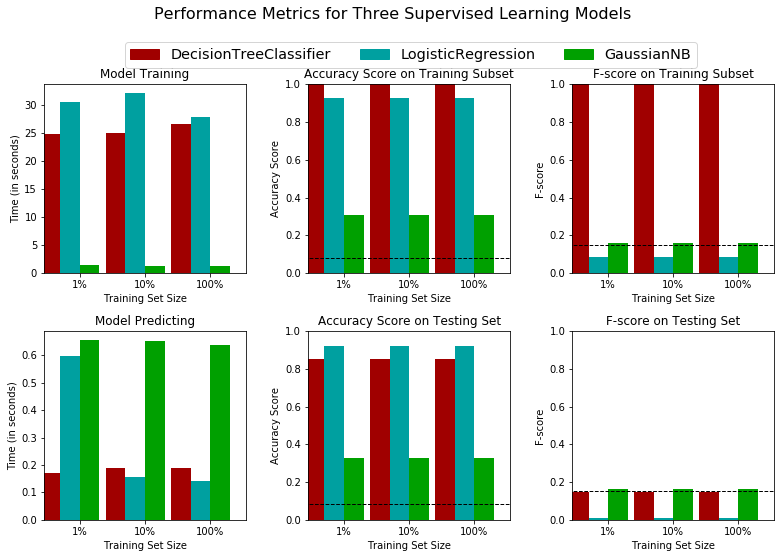

In [72]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, f1_score_value)

In [73]:
# Import the three supervised learning models from sklearn
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Initialize the three models

clf_D = XGBClassifier(random_state=0)
clf_E = GradientBoostingClassifier(random_state=0)
clf_F = RandomForestClassifier(n_estimators=30,random_state=0)


samples_100 = len(y_train)
print( "samples_100 = " + str(samples_100))
samples_10 = len(y_train) / 10
print ("samples_10 = " + str(samples_10))
samples_1 = len(y_train) / 100
print ("samples_1=" + str(samples_1))

# Collect results on the learners)
results = {}
for clf in [clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    print ("Getting results for clf_name=" + str(clf_name))
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        print ("Getting results for samples=" + str(samples))
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



samples_100 = 215257
samples_10 = 21525.7
samples_1=2152.57
Getting results for clf_name=XGBClassifier
Getting results for samples=2152.57
Doing learner.fit
Done learner.fit
training time=127.99821949005127
Doing learner.predict X_test


E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Doing learner.predict X_train 300 samples
prediction time=1.2992854118347168
Calculating accuracy_score
accuracy_score on 300 samples of training data=0.9233333333333333
accuracy_score on test data=0.9205888091573265
Calculating f1_score
f1_score on 300 samples of training data=0.0
f1_score on test data=0.005700325732899024
Calculating f1_score
roc_auc_score on 300 samples of training data=0.5
roc_auc_score on test data=0.50138929953749
XGBClassifier trained on 2152.57 samples.
Getting results for samples=21525.7
Doing learner.fit
Done learner.fit
training time=125.9269917011261
Doing learner.predict X_test


E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Doing learner.predict X_train 300 samples
prediction time=0.9042308330535889
Calculating accuracy_score
accuracy_score on 300 samples of training data=0.9233333333333333
accuracy_score on test data=0.9205888091573265
Calculating f1_score
f1_score on 300 samples of training data=0.0
f1_score on test data=0.005700325732899024
Calculating f1_score
roc_auc_score on 300 samples of training data=0.5
roc_auc_score on test data=0.50138929953749
XGBClassifier trained on 21525.7 samples.
Getting results for samples=215257
Doing learner.fit
Done learner.fit
training time=122.79929876327515
Doing learner.predict X_test


E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Doing learner.predict X_train 300 samples
prediction time=0.8904173374176025
Calculating accuracy_score
accuracy_score on 300 samples of training data=0.9233333333333333
accuracy_score on test data=0.9205888091573265
Calculating f1_score
f1_score on 300 samples of training data=0.0
f1_score on test data=0.005700325732899024
Calculating f1_score
roc_auc_score on 300 samples of training data=0.5
roc_auc_score on test data=0.50138929953749
XGBClassifier trained on 215257 samples.
Getting results for clf_name=GradientBoostingClassifier
Getting results for samples=2152.57
Doing learner.fit
Done learner.fit
training time=166.84947872161865
Doing learner.predict X_test
Doing learner.predict X_train 300 samples
prediction time=0.6240260601043701
Calculating accuracy_score
accuracy_score on 300 samples of training data=0.92
accuracy_score on test data=0.9204804127734298
Calculating f1_score
f1_score on 300 samples of training data=0.0
f1_score on test data=0.0158304266165817
Calculating f1_scor

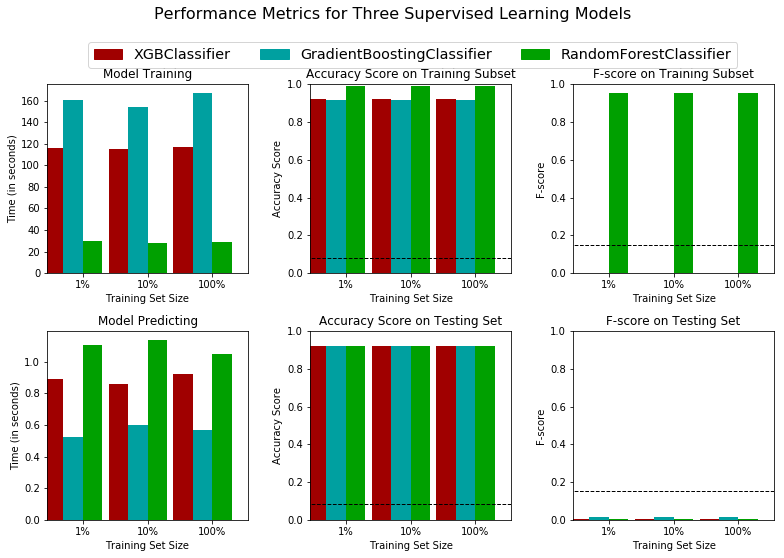

In [92]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, f1_score_value)


## Choosing the model

ROC-AU score,  Accuracy Score, F score on test data and 300 training samples alongwith Training Time and Prediction time are listed below -
 
  
 | Metric                 | Decision Tree  | Logistics        | GaussianNB      |XGBBoost     | GradientBoost | RandomForest  |
 | :---------------------:| :------------: | :--------------: | :-------------: | :---------: | :-----------: | :-------------|
 | ROC-AUC (test)         |  0.537319      | 0.502448         | 0.557352        | 0.501365    | 0.503695      | 0.500826      |
 | ROC-AUC (300 training) |  1.0           | 0.521739         | 0.564746        | 0.5         | 0.498194      | 0.956521      | 
 | Accuracy (test)        |  0.85338       | 0.920361         | 0.325134        | 0.920545    | 0.920480      | 0.920470      |
 |Accuracy(300 training)  |  0.85338       | 0.926666         | 0.306667        | 0.923333      0.92          | 0.993333      |
 | F1 score (test data)   |  0.149094      | 0.010771         | 0.164253        | 0.005697    | 0.015830      | 0.003531      |
 | F1 score(300 training) |  1.0           | 0.083333         | 0.161290        | 0.0         | 0.0           | 0.954545      |
 | Training  Time         |  24.800899     | 23.82941         | 1.342295        | 117.141126  | 166.722213    | 28.703508     |
 | Prediction Time        |  0.171837      | 0.109350         | 0.623674        | 0.922175    | 0.567169      | 1.050263      |
 
 
 
 From the above result we can see teh ROC-AUC scorewise best model is GaussianNB having score 0.557352. However, we can not
 take this model as Accuracy is very low (only 0.32) also in sklearn this model does not provide the actual probability.
 
 The next best model is: Decision tree having ROC-AUC score of 0.537319 and accuracy score 0.85338. But I could not consider 
 this model, as Decision Tree model has overfitting issues. Another main reason is that it does not provide the actual probabiluty.
 
 
 Next best model is: GradientBoost which has good ROC-AUC score of 0.503695 and accuracy score of 0.920480. Although, scores
 of XGBBoost is comparable with GradientBoost. But I would still go with GradientBoost, becuase it has better F1 score ( 0.015830) , than XGBBoost (0.005697)
 
 So teh best traditional machine learning models I found is GradientBoost

## Preparing to submit to Kaggle

Following steps are for preparing data for submission to Kaggle

* Use the predict_proba to the the GradientBoost model to get teh probabily
* Get SK_ID_CURR field of test_data and store as test_data_id
* Merge first column of probability and merge with test_data_id
* Save the dataframe to the CSV file
* Submit to Kaggle

In [87]:
grad_boost_model = clf_E

In [156]:
gbc_proba_predict_test = grad_boost_model.predict(X_test)
rc_score = roc_auc_score( y_test, gbc_proba_predict_test)

In [145]:
gbc_proba_test_score = grad_boost_model.predict_proba(X_test)

In [153]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbc_proba_test_score[:,1], pos_label=1)

In [154]:
fpr

array([0.00000000e+00, 0.00000000e+00, 2.35532421e-05, ...,
       9.99528935e-01, 9.99528935e-01, 1.00000000e+00])

In [155]:
tpr

array([1.36239782e-04, 2.72479564e-04, 2.72479564e-04, ...,
       9.99863760e-01, 1.00000000e+00, 1.00000000e+00])

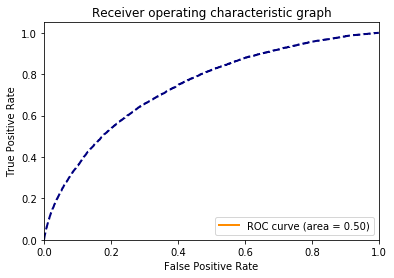

In [158]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rc_score)
plt.plot(fpr, tpr, color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic graph')
plt.legend(loc="lower right")
plt.show()

In [88]:
gbc_proba = grad_boost_model.predict_proba(test_data_x)

In [89]:
gbc_proba

array([[0.95805732, 0.04194268],
       [0.44370391, 0.55629609],
       [0.83679721, 0.16320279],
       ...,
       [0.95118904, 0.04881096],
       [0.9196496 , 0.0803504 ],
       [0.75743379, 0.24256621]])

In [90]:
gbc_proba_frame = pd.DataFrame(list(gbc_proba[:,1]), columns=['TARGET'])

In [91]:
test_data_id = test_data[['SK_ID_CURR']]

In [92]:
gbc_frame = pd.merge(test_data_id, gbc_proba_frame, left_index=True, right_index=True)

In [93]:
gbc_frame.head()

,SK_ID_CURR,TARGET
0,100001,0.041943
1,100005,0.556296
2,100013,0.163203
3,100028,0.037223
4,100038,0.167112


In [94]:
gbc_frame.to_csv('credit_risk_submission.csv', index=False, header=True)

## My score on kaggle (0.55958) is as below:

If image below is not visible, please use the URL:

https://drive.google.com/open?id=10CulFKD6OA21edTiAHSzeI1gbfxClhb9

<img src="my_kaggle_score.png">

## My Ranking on Kaggle

As this is a late submission, I would not get the ranking for this submission (but original ranking was  when I submitted before deadline was: 7159 on a score of 0.49769). The Highest score in Private Leadership is 0.80570.

It is not clear whether late submission score is based on Private Leadership rank or Public Leadership Rank. If I would have made the same submission before deadline and if late submission is based on Private leadership Rank, my rank in Private leadership would have been 6804  and if it is base on public leadership, my rank in public leadership would have been 6807. Total teams were 7198. Also, this is tthe first time I am participating in Kaggle competetion. Thanks a lot to Udactiy for this 


## Further Refinement of Model

The model can be further refined using grid search (GridSearchCV) where parameters with different values are provided and grid search finds the best . I also tried the following code to refine the model but unfortunately in my computer it got hang after multiple attempts.

Another way to refine using Deep Neural Network techniques,which I have given below

In [ ]:
#  Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


#  Initialize the classifier
grad_boost_classifier = GradientBoostingClassifier(random_state=0)


parameters= {'n_estimators': [100, 150, 200], 'learning_rate':[ 0.5, 0.2, 0.1], 'max_depth': [3,6]  }


#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(grad_boost_classifier, param_grid=parameters,  scoring='roc_auc')

#  Fit the grid search object to the training data and find the optimal parameters using fit()
print("Calling fit on grid_obj")
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
print("Calling predict")
predictions = (grad_boost_classifier.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

best_parameters = grid_obj.best_estimator_.get_params()
print("Best parameters are:")
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("roc-auc score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final roc-auc on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

## Neural Network
For refinement to the model I tried to build Deep Neural Nework with 256 x 256 hidden layer, MinibatchGradient with the following:
* AdamOptimizer
* batch size = 256
* epochs = 25
* learning rate =0.01
* keep_probability = 0.8

In [115]:
import tensorflow as tf
def deep_neural_network(x, weights, biases,  keep_prob):
    hidden_layer1 = tf.add(tf.matmul(x, weights["w1"]), biases["b1"])
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    hidden_layer1 = tf.nn.dropout(hidden_layer1, keep_prob) 
    hidden_layer2 = tf.matmul(hidden_layer1, weights["w2"]) + biases["b2"]
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    hidden_layer2 = tf.nn.dropout(hidden_layer2, keep_prob) 
    output_layer = tf.matmul(hidden_layer2, weights["out"]) + biases["out"]
    return output_layer

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [116]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
 
    max_value = 2
    if not "encode_map" in globals(): 
        global encode_map
        encode_map = {}
        
    value = encode_map.get(str(x))
    if value is not None:
        return value
  
    hot_encode = np.eye(max_value)[x]
    encode_map[str(x)] = hot_encode
    return hot_encode

In [117]:
y_train_encode = one_hot_encode(y_train)
y_test_encode = one_hot_encode(y_test)
print("y_train_encode.shape:" + str(y_train_encode.shape))
print("y_test_encode.shape:" + str(y_test_encode.shape))

y_train_encode.shape:(215257, 2)
y_test_encode.shape:(92254, 2)


In [140]:
hidden_layer1_length = 256
hidden_layer2_length = 256
input_feature_size = X_train.shape[1]
output_classes = 2
learning_rate = 0.001
epochs = 25
batch_size = 256
keep_prob_value = 0.8

weights = {
    'w1': tf.Variable(tf.random_normal([input_feature_size, hidden_layer1_length])),
    'w2': tf.Variable(tf.random_normal([ hidden_layer1_length, hidden_layer2_length])),
    'out': tf.Variable(tf.random_normal([hidden_layer2_length, output_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer1_length])),
    'b2': tf.Variable(tf.random_normal([hidden_layer2_length])),
    'out': tf.Variable(tf.random_normal([output_classes]))
}

keep_prob = tf.placeholder("float")


x = tf.placeholder("float", [None, input_feature_size])
y = tf.placeholder("float", [None, output_classes])

logits = deep_neural_network(x, weights, biases, keep_prob)

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [141]:
def print_stats(session, valid_features, valid_labels, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: valid_features,
                        y: valid_labels,
                        keep_prob: 1.
                    })
    validation_accuracy = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, validation_accuracy))

In [159]:
import sklearn
predictions_proba = None
y_p = None
y_pred = None
y_true = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0.0
        total_batch = int(len(X_train) / batch_size)
        x_batches = np.array_split(X_train, total_batch)
        y_batches = np.array_split(y_train_encode, total_batch)
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: keep_prob_value
                            })
          
        print('Epoch {:>2}:  '.format(epoch + 1), end='')
        print_stats(sess, batch_x, batch_y, cost, accuracy)
           

    print("Neutral Network training done!")

    print("Training Accuracy:", accuracy.eval({x: X_train, y: y_train_encode, keep_prob: 1.0}))
    print("Testing Accuracy:", accuracy.eval({x: X_test, y: y_test_encode, keep_prob: 1.0}))
   
    probs = tf.nn.softmax(logits)
    predictions_proba_dev_test = sess.run(probs, feed_dict={ x:X_test,
                                                    keep_prob: 1.0
                            })
    predictions_proba = sess.run(probs, feed_dict={ x:test_data_x,
                                                    keep_prob: 1.0
                            })

Epoch  1:  Loss:    30.4085 Validation Accuracy: 0.859375
Epoch  2:  Loss:     6.4977 Validation Accuracy: 0.851562
Epoch  3:  Loss:     0.5093 Validation Accuracy: 0.875000
Epoch  4:  Loss:     0.3793 Validation Accuracy: 0.875000
Epoch  5:  Loss:     0.3872 Validation Accuracy: 0.875000
Epoch  6:  Loss:     0.3862 Validation Accuracy: 0.875000
Epoch  7:  Loss:     0.3631 Validation Accuracy: 0.875000
Epoch  8:  Loss:     0.3719 Validation Accuracy: 0.875000
Epoch  9:  Loss:     0.3873 Validation Accuracy: 0.875000
Epoch 10:  Loss:     0.3877 Validation Accuracy: 0.875000
Epoch 11:  Loss:     0.3858 Validation Accuracy: 0.875000
Epoch 12:  Loss:     0.3850 Validation Accuracy: 0.875000
Epoch 13:  Loss:     0.3826 Validation Accuracy: 0.875000
Epoch 14:  Loss:     0.3800 Validation Accuracy: 0.875000
Epoch 15:  Loss:     0.3778 Validation Accuracy: 0.875000
Epoch 16:  Loss:     0.3702 Validation Accuracy: 0.875000
Epoch 17:  Loss:     0.3719 Validation Accuracy: 0.875000
Epoch 18:  Los

In [161]:
predictions_proba_dev_test

array([[0.89019126, 0.10980874],
       [0.92017066, 0.07982932],
       [0.9158508 , 0.08414926],
       ...,
       [0.9158508 , 0.08414926],
       [0.8917301 , 0.10826991],
       [0.9267201 , 0.07327992]], dtype=float32)

## Receiver Operating Characteristic Curve is given as below

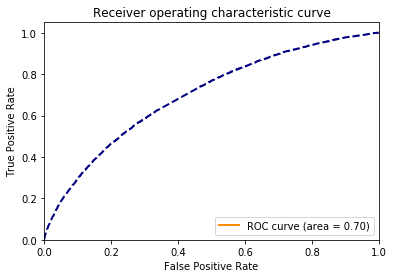

In [168]:
rc_score_neural = roc_auc_score(y_test, predictions_proba_dev_test[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_proba_dev_test[:,1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rc_score_neural )
plt.plot(fpr, tpr, color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [160]:
predictions_proba

array([[0.9308904 , 0.06910965],
       [0.8758603 , 0.12413967],
       [0.94137734, 0.05862269],
       ...,
       [0.935955  , 0.06404496],
       [0.9158508 , 0.08414926],
       [0.89415413, 0.10584586]], dtype=float32)

In [144]:
neural_proba_frame = pd.DataFrame(list(predictions_proba[:,1]), columns=['TARGET'])
neural_frame = pd.merge(test_data_id, neural_proba_frame, left_index=True, right_index=True)
neural_frame.to_csv('credit_risk_submission_neural.csv', index=False, header=True)

## Kagle Submission

I submitted again to Kaggle and got a score of 0.67380. if image is not visibile, you can try the following link:

https://drive.google.com/file/d/1JoPdA8VYwjJXkFNJu5_WzANr-BbmZzot/view

As this was late submission, I did not get the leadership ranking. But if I had submitted the same before deadline, I would have got ranking of 6443 (for both public and private leadership

